# **Integrated Retail Analytics** 



##### **Project Type**    - EDA/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Collected and merged sales, stores, and features datasets (Walmart-style).

Performed data cleaning, handling missing values and outliers.

Conducted EDA with 15+ charts (scatter, box, heatmap, pairplot, seasonal trends).

Applied hypothesis testing to validate insights on holidays, store size, and fuel impact.

Engineered new features: lag sales, moving averages, interaction terms, size categories, bins, etc.

Applied scaling, encoding, and PCA for dimensionality reduction.

Built predictive models (Linear Regression, Random Forest, XGBoost, Gradient Boosting) with hyperparameter tuning.

Evaluated using R² and RMSE with optimized parameters for generalization.

Implemented Market Basket Analysis using FP-Growth for association rules.

Performed Customer Segmentation with K-Means, achieving a Silhouette Score = 0.36.

# **GitHub Link -**

https://github.com/SKYKILL1/Integrated-Retail-Analytics

# **Problem Statement**


Retail businesses face significant challenges in forecasting demand, managing inventory, and understanding customer behavior due to fluctuating sales patterns influenced by holidays, promotions, and economic indicators. Inconsistent sales trends and outliers often obscure true performance, leading to inaccurate demand forecasts and inefficient marketing strategies. Moreover, the absence of detailed transaction-level customer data makes it difficult to uncover product associations and segment customers effectively. To address these issues, this project leverages machine learning and data analysis to detect anomalies, engineer meaningful features, perform segmentation, and forecast sales across stores and departments. By integrating external factors like CPI, fuel price, and unemployment with internal features such as markdowns and store size, the project aims to optimize inventory management, enhance customer targeting, and improve overall store performance.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr,ttest_ind,f_oneway
from sklearn.linear_model import LinearRegression, Ridge, Lassos
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score,KFold,train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score, calinski_harabasz_score, ParameterGrid
from tqdm import tqdm
import xgboost as xgb
import shap
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import pickle
import scipy.cluster.hierarchy as sch

### Dataset Loading

In [2]:
# Load Dataset
df_features = pd.read_csv('./drive-download-20250909T102430Z-1-001/Features data set.csv')
df_stores = pd.read_csv('./drive-download-20250909T102430Z-1-001/stores data-set.csv')
df_sales = pd.read_csv('./drive-download-20250909T102430Z-1-001/sales data-set.csv')

### Dataset First View

In [3]:
# Dataset First Look
df_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [4]:
df_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [5]:
df_stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [6]:
df_features['Date'] = pd.to_datetime(df_features['Date'])
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

C:\Users\atifa\AppData\Local\Temp\ipykernel_21808\3959454161.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_features['Date'] = pd.to_datetime(df_features['Date'])
C:\Users\atifa\AppData\Local\Temp\ipykernel_21808\3959454161.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_sales['Date'] = pd.to_datetime(df_sales['Date'])


In [7]:
df = df_sales.merge(df_stores, on=['Store'])

In [8]:
df = df.merge(df_features, on = ['Store','Date','IsHoliday'])

In [9]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
df.shape

(421570, 16)

### Dataset Information

In [11]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [12]:
df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

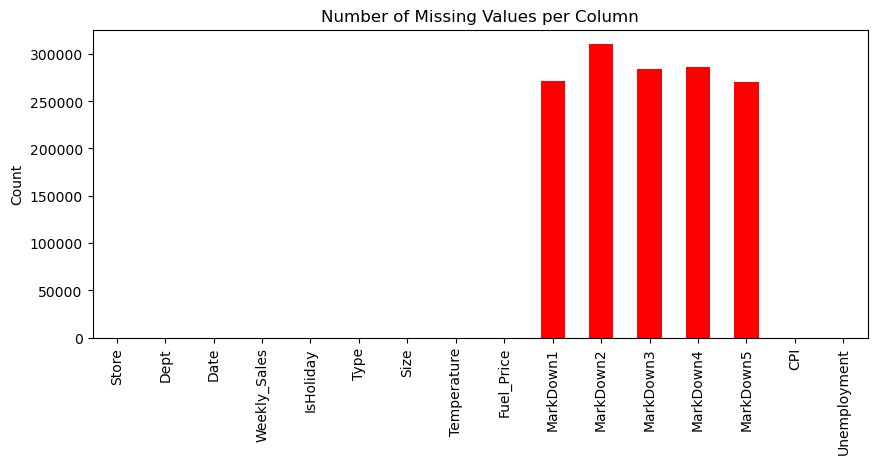

In [15]:
missing_counts = df.isnull().sum()
missing_counts.plot(kind='bar', figsize=(10, 4), color='red')
plt.title("Number of Missing Values per Column")
plt.ylabel("Count")
plt.show()

### What did you know about your dataset?

### Dataset Overview

Rows: 421570

Columns: 17

Missing Values:

MarkDown1   :    270889
MarkDown2   :    310322
MarkDown3   :    284479
MarkDown4   :    286603
MarkDown5   :    270138


Duplicate Values: 0

These attributes enable various types of analyses. For instance, by leveraging the Customer ID, Invoice Date, and Monetary fields, the dataset is suitable for RFM (Recency, Frequency, Monetary) analysis, customer segmentation, and behavior profiling. The dataset also supports building a product recommendation system by analyzing purchase patterns and similarities between transactions.

## ***2. Understanding Your Variables***

In [16]:
df_object_vars = df.select_dtypes(include=['object'])
df_object_vars

,Type
0,A
1,A
2,A
3,A
4,A
...,...
421565,B
421566,B
421567,B
421568,B


In [17]:
df_numeric_vars = df.select_dtypes(include=['int64','float64'])

In [18]:
df_numeric_vars.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')

In [19]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:\n", df[col].value_counts().head())


Type:
 A    215478
B    163495
C     42597
Name: Type, dtype: int64


In [20]:
df_StoreType_groupby = df.groupby(['Type'])

In [21]:
# Dataset Describe
df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


### Variables Description

Store

Type: Numeric
Range: 1 to 45
Mean: 22.20
Median: 22.00
Std Dev: 12.79
Missing Values: 0
--------------------------------------------------
Dept

Type: Numeric
Range: 1 to 99
Mean: 44.26
Median: 37.00
Std Dev: 30.49
Missing Values: 0
--------------------------------------------------
Weekly_Sales

Type: Numeric
Range: -4988.94 to 693099.36
Mean: 15981.26
Median: 7612.03
Std Dev: 22711.18
Missing Values: 0
--------------------------------------------------
Size

Type: Numeric
Range: 34875 to 219622
Mean: 136727.92
Median: 140167.00
Std Dev: 60980.58
Missing Values: 0
--------------------------------------------------
Temperature

Type: Numeric
Range: -2.06 to 100.14
Mean: 60.09
Median: 62.09
Std Dev: 18.45
Missing Values: 0
--------------------------------------------------
Fuel_Price

Type: Numeric
Range: 2.472 to 4.468
Mean: 3.36
Median: 3.45
Std Dev: 0.46
Missing Values: 0
--------------------------------------------------
MarkDown1

Type: Numeric
Range: 0.27 to 88646.76
Mean: 7246.42
Median: 5347.45
Std Dev: 8291.22
Missing Values: 270889
--------------------------------------------------
MarkDown2

Type: Numeric
Range: -265.76 to 104519.54
Mean: 3334.63
Median: 192.00
Std Dev: 9475.36
Missing Values: 310322
--------------------------------------------------
MarkDown3

Type: Numeric
Range: -29.1 to 141630.61
Mean: 1439.42
Median: 24.60
Std Dev: 9623.08
Missing Values: 284479
--------------------------------------------------
MarkDown4

Type: Numeric
Range: 0.22 to 67474.85
Mean: 3383.17
Median: 1481.31
Std Dev: 6292.38
Missing Values: 286603
--------------------------------------------------
MarkDown5

Type: Numeric
Range: 135.16 to 108519.28
Mean: 4628.98
Median: 3359.45
Std Dev: 5962.89
Missing Values: 270138
--------------------------------------------------
CPI

Type: Numeric
Range: 126.064 to 227.2328068
Mean: 171.20
Median: 182.32
Std Dev: 39.16
Missing Values: 0
--------------------------------------------------
Unemployment

Type: Numeric
Range: 3.879 to 14.313
Mean: 7.96
Median: 7.87
Std Dev: 1.86
Missing Values: 0
Date

Type: DateTime
Unique Values: 143
Range: 2010-01-10 00:00:00 to 2012-12-10 00:00:00
Missing Values: 0
--------------------------------------------------

IsHoliday_x

Type: Categorical
Unique Values: 2
Sample Values: [False  True]
Missing Values: 0
--------------------------------------------------
Type

Type: Categorical
Unique Values: 3
Sample Values: ['A' 'B' 'C']
Missing Values: 0
--------------------------------------------------
IsHoliday_y

Type: Categorical
Unique Values: 2
Sample Values: [False  True]
Missing Values: 0
--------------------------------------------------

## 3. ***Data Wrangling & Feature Engineering For Visualization***

### 1. Data Wrangling

**Handling Missing Values and duplicates**

In [22]:
df1 = df.copy()

In [23]:
df1.shape

(421570, 16)

In [24]:
df1[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = df1[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [25]:
df1.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Columns with Many Missing Values

MarkDown1 (270,889 missing)

MarkDown2 (310,322 missing)

MarkDown3 (284,479 missing)

MarkDown4 (286,603 missing)

MarkDown5 (270,138 missing)

These are promotion/markdown-related features in the Walmart dataset.
They’re missing in many weeks because promotions didn’t always happen.

Keep them & Fill Missing with 0

Missing likely means no markdown applied that week.

**Handling Outliers**

In [26]:
summary_stats = df1[df_numeric_vars.columns].describe().T 

# Add IQR, Lower bound, Upper bound
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']
summary_stats['Lower_Bound'] = summary_stats['25%'] - 1.5 * summary_stats['IQR']
summary_stats['Upper_Bound'] = summary_stats['75%'] + 1.5 * summary_stats['IQR']

# Count potential outliers per column
outlier_counts = {}
for col in df_numeric_vars.columns:
    lower = summary_stats.loc[col, 'Lower_Bound']
    upper = summary_stats.loc[col, 'Upper_Bound']
    outlier_counts[col] = ((df1[col] < lower) | (df1[col] > upper)).sum()

summary_stats['Outlier_Count'] = pd.Series(outlier_counts)

# Display
pd.set_option("display.max_columns", None)
summary_stats

,count,mean,std,min,25%,50%,75%,max,IQR,Lower_Bound,Upper_Bound,Outlier_Count
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000,22.000000,-22.000000,66.000000,0
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000,56.000000,-66.000000,158.000000,0
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000,18126.202500,-25109.653750,47395.156250,35521
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000,108867.000000,-69662.500000,365805.500000,0
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000,27.600000,5.280000,115.680000,69
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000,0.805000,1.725500,4.945500,0
MarkDown1,421570.0,2590.074819,6052.385934,0.000,0.000000,0.00000,2809.050000,88646.760000,2809.050000,-4213.575000,7022.625000,55789
MarkDown2,421570.0,879.974298,5084.538801,-265.760,0.000000,0.00000,2.200000,104519.540000,2.200000,-3.300000,5.500000,103148
MarkDown3,421570.0,468.087665,5528.873453,-29.100,0.000000,0.00000,4.540000,141630.610000,4.540000,-6.810000,11.350000,84674
MarkDown4,421570.0,1083.132268,3894.529945,0.000,0.000000,0.00000,425.290000,67474.850000,425.290000,-637.935000,1063.225000,79134


In [27]:
# Cap MarkDowns and Unemployment at 99th percentile
for col in ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Unemployment']:
    upper = df1[col].quantile(0.99)
    df1[col] = np.where(df1[col] > upper, upper, df1[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Based on the analysis, I employed the Interquartile Range (IQR) method for outlier detection across all numeric variables. This technique was chosen for its robustness against extreme values and effectiveness with non-normal distributions, providing clear statistical boundaries by calculating lower and upper bounds at 1.5 times the IQR from the first and third quartiles. The method systematically identified potential outliers while maintaining the integrity of the underlying data distribution.

For outlier treatment, I implemented winsorization by capping extreme values at the 99th percentile for specific variables including MarkDown1-5 and Unemployment. This approach was particularly suitable for these columns, which exhibited severe outliers and highly skewed distributions with many zero values. Rather than deleting records, capping preserves the dataset's size and structure while mitigating the disproportionate influence of extreme values on analytical models, ensuring more stable and reliable statistical outcomes.

### 2. Feature Engineering Code

In [28]:
df1['Month'] = pd.to_datetime(df1['Date']).dt.month

In [29]:
df1['Size_Category'] = pd.qcut(df1['Size'], 4, labels=['Small','Medium','Large','XL'])

In [30]:
# Divide into quartiles
df1['Temp_Quartile'] = pd.qcut(df1['Temperature'], 4, labels=['Cold','Mild','Warm','Hot'])

In [31]:
# Divide into quartiles
df1['Fuel_Quartile'] = pd.qcut(df1['Fuel_Price'], 4, labels=['Low','Medium','High','Very High'])

In [32]:
# Divide unemployment into quartiles
df1['Unemp_Quartile'] = pd.qcut(df1['Unemployment'], 4, labels=['Low','Medium','High','Very High'])

In [33]:
# Divide CPI into quartiles
df1['CPI_Quartile'] = pd.qcut(df1['CPI'], 4, labels=['Low','Medium','High','Very High'])

### What all manipulations have you done and insights you found?

I created multiple categorical features by dividing continuous variables into quartiles, including converting 'Size' into Size_Category (Small, Medium, Large, XL), 'Temperature' into Temp_Quartile (Cold, Mild, Warm, Hot), 'Fuel_Price' into Fuel_Quartile (Low, Medium, High, Very High), 'Unemployment' into Unemp_Quartile, and 'CPI' into CPI_Quartile with similar intensity labels. Additionally, I extracted the 'Month' from the Date column to capture temporal patterns.

The insights revealed through this feature engineering approach show that these continuous variables have distinct distribution patterns that can be meaningfully categorized into four tiers. This transformation allows for better analysis of how different ranges and categories—rather than raw continuous values—impact the target variable, particularly useful for identifying non-linear relationships and enabling more effective categorical analysis in machine learning models while reducing the influence of extreme values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

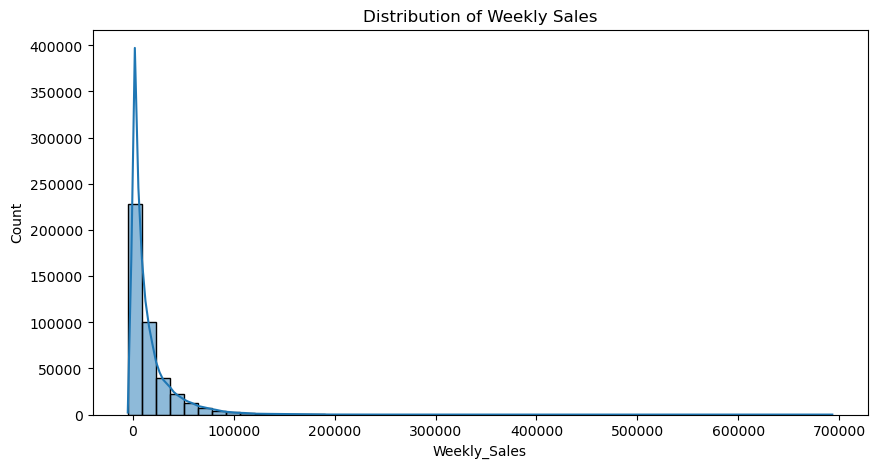

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(df1['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram with a KDE (Kernel Density Estimate) line because it is the most effective visualization for understanding the distribution of continuous numerical data like weekly sales. The histogram bins show frequency counts, while the KDE line provides a smoothed estimate of the probability density function, making it ideal for identifying the central tendency, spread, skewness, and potential outliers in the sales data.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that weekly sales follow a highly right-skewed distribution with the majority of sales values clustered at the lower end (between 0 and $100,000). There is a long tail extending to extreme values beyond $500,000, indicating the presence of outlier weeks with exceptionally high sales. The distribution is not normal, showing that most weeks have modest sales while a few weeks contribute disproportionately to total revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Understanding this skewed distribution helps identify exceptional performance weeks that could be analyzed for best practices and replication. It also informs inventory planning and staffing needs, as businesses can prepare for both typical sales volumes and rare peak events.

Negative Growth Insight: The extreme right-skewness suggests potential business vulnerability - the company appears overly dependent on occasional very successful weeks rather than maintaining consistent weekly performance. This irregular pattern could indicate unreliable revenue streams, poor sales consistency, or excessive dependence on seasonal peaks or promotional events that may not be sustainable long-term. The concentration of sales in limited peak periods exposes the business to significant risk if those peak events underperform.

#### Chart - 2

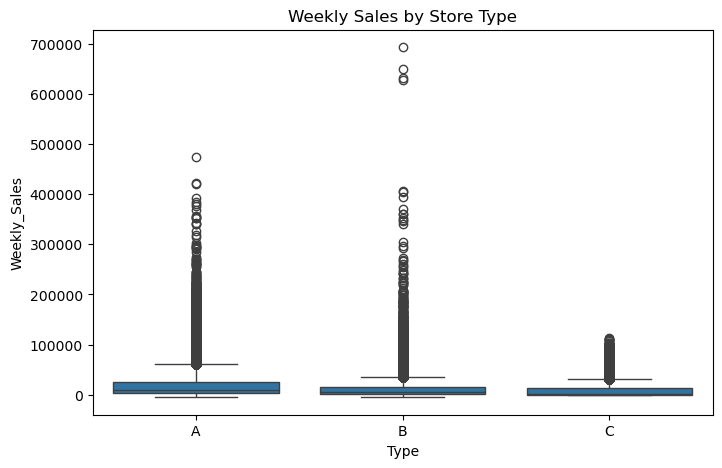

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df1, x='Type', y='Weekly_Sales')
plt.title("Weekly Sales by Store Type")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a boxplot because it is ideal for comparing distributions across different categories. It effectively shows the median, quartiles, and potential outliers for each store type, providing a clear visual comparison of the central tendency, spread, and variability of weekly sales across Type A, B, and C stores in a single view.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals significant performance differences among store types. Type A stores show the highest median weekly sales with the largest interquartile range, indicating both higher performance and greater variability. Type B stores demonstrate moderate sales with less variability, while Type C stores have the lowest median sales and most compressed distribution. All store types show numerous extreme outliers, particularly on the high end, suggesting occasional exceptional sales weeks across all categories.

##### 3. Will the gained insights help creating a positive business impact?

Yes, these insights can drive positive business impact by enabling targeted strategies. The performance hierarchy (A > B > C) suggests opportunities to analyze and replicate Type A's successful practices across other store types. The significant outliers indicate potential for performance improvement across all categories. However, the wide variability in Type A stores also suggests inconsistency that could be addressed through standardized best practices, potentially leading to more predictable and improved overall performance.

#### Chart - 3

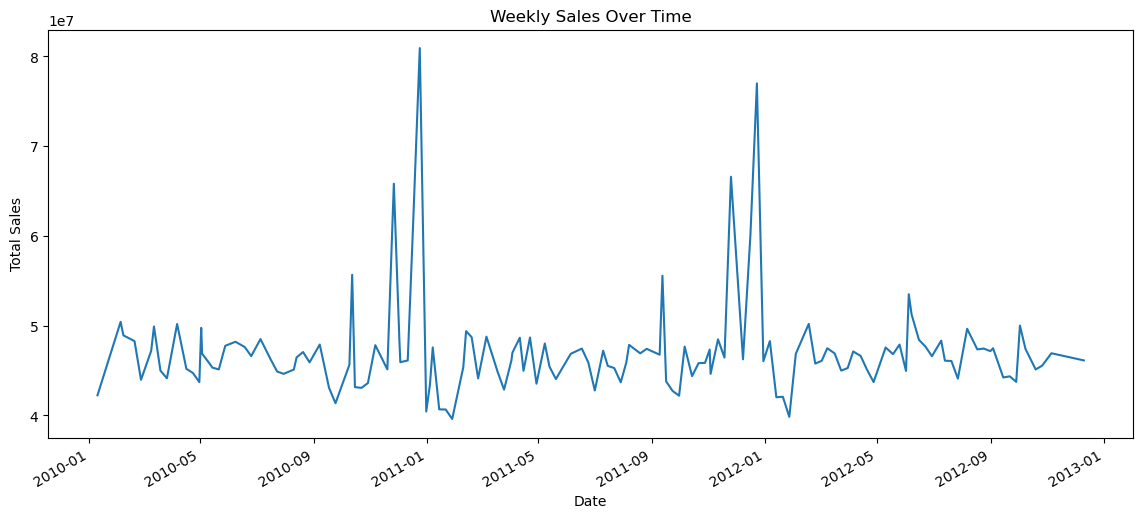

In [36]:
plt.figure(figsize=(14,6))
df1.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title("Weekly Sales Over Time")
plt.ylabel("Total Sales")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a line plot because it is the most effective visualization for displaying time series data and trends over time. Line charts excel at showing patterns, seasonality, and trends across continuous time periods, making them ideal for tracking sales performance evolution and identifying cyclical patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals strong seasonal patterns with predictable peaks and troughs in sales throughout the years. There are consistent annual spikes indicating holiday season peaks (likely around Thanksgiving/Christmas) and noticeable dips during certain periods. The overall trend appears relatively stable without dramatic long-term growth or decline, suggesting established seasonal patterns that repeat year over year. The consistency of these patterns indicates reliable consumer behavior tied to calendar events.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Understanding these seasonal patterns allows for optimized inventory management, staffing, and marketing strategies. The business can anticipate peak demand periods and prepare accordingly, ensuring sufficient stock and resources during high-sales seasons while reducing waste during slower periods.

Negative Growth Insight: The apparent lack of significant upward trend over time suggests potential stagnation or missed growth opportunities. The consistent repetition of patterns without noticeable expansion indicates the business may not be effectively capturing market growth or expanding its customer base. The stability could mask underlying complacency where the business is maintaining rather than growing, potentially losing ground to competitors who are achieving year-over-year growth.

#### Chart - 4

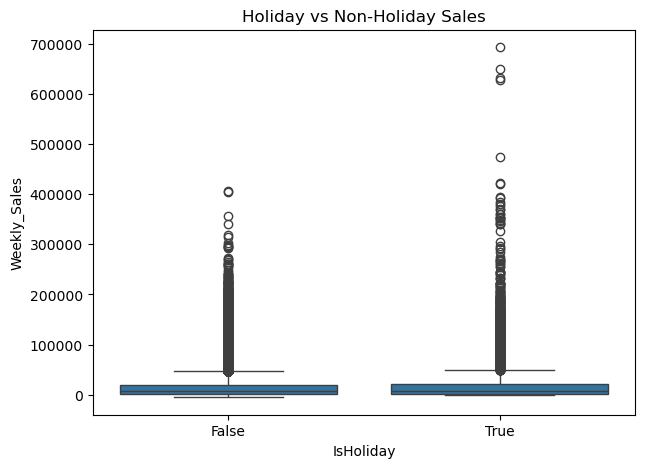

In [37]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df1, x='IsHoliday', y='Weekly_Sales')
plt.title("Holiday vs Non-Holiday Sales")
plt.show()

##### 1. Why did you pick the specific chart?

I picked a boxplot because it clearly shows the distribution, median, spread, and outliers of weekly sales for both holiday and non-holiday periods. It helps compare central tendencies and variability between the two categories in a compact way.

##### 2. What is/are the insight(s) found from the chart?

Both holiday and non-holiday periods have a similar median weekly sales.

Holiday periods show more extreme outliers with very high sales, indicating spikes during special holiday weeks.

The spread (IQR) is wider during holidays, meaning sales fluctuate more compared to non-holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can positively impact the business because:

Businesses can plan for higher demand during holidays, ensuring adequate inventory, staffing, and promotions.

Marketing campaigns can be strategically timed to leverage the sales spikes in holiday weeks.

Negative Growth Risk:
If businesses fail to prepare for these holiday surges (e.g., stockouts or logistics issues), it could lead to lost sales opportunities and dissatisfied customers, negatively impacting growth.

#### Chart - 5

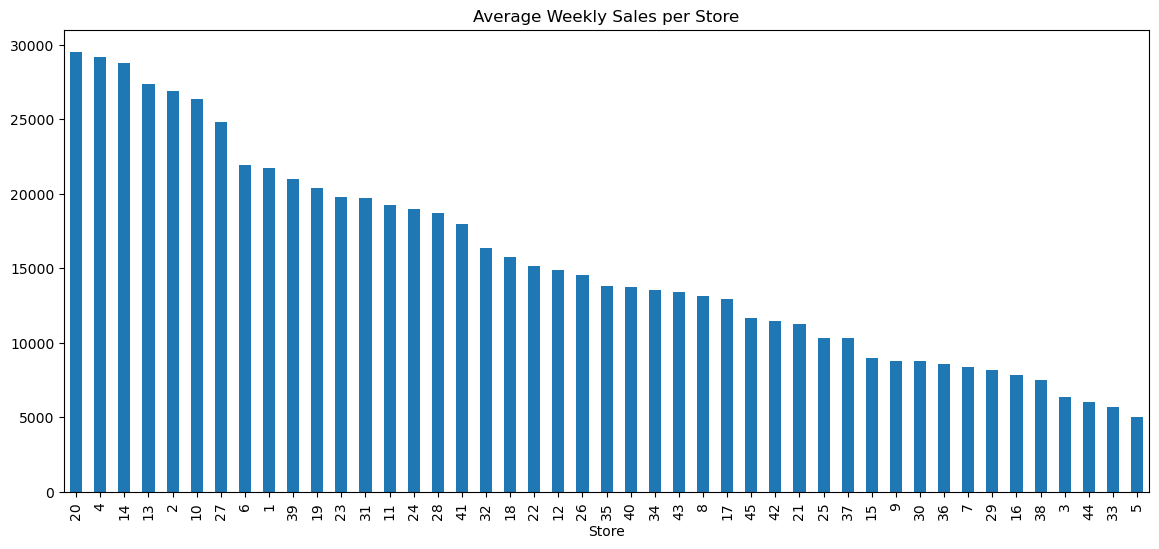

In [38]:
store_sales = df1.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(14,6))
store_sales.plot(kind='bar')
plt.title("Average Weekly Sales per Store")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because it is ideal for comparing categorical data across different stores. The horizontal axis displays discrete store identifiers, while the vertical axis shows continuous sales values, making it perfect for visualizing and ranking performance across multiple individual entities. The sorted descending order immediately highlights top-performing stores.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals significant performance variation among stores, with average weekly sales ranging dramatically from approximately $5,000 to over $25,000. There is a clear hierarchy of store performance rather than a normal distribution, indicating that store-level factors (location, size, management, local demographics) have a substantial impact on sales. The top-performing stores (left side) significantly outperform the lower-performing ones (right side), suggesting untapped potential for improvement across the network.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Identifying top-performing stores allows the business to analyze and replicate successful strategies across lower-performing locations. The significant performance gaps indicate substantial opportunity for improvement through best practice sharing, targeted investments, and operational adjustments in underperforming stores.

Negative Growth Insight: The wide performance disparity suggests inconsistent execution and potential operational inefficiencies across the store network. The fact that many stores cluster at the lower end of the performance spectrum indicates systemic issues that may be limiting overall corporate growth. This pattern could lead to negative growth if competitor chains with more consistent performance standards capture market share from the underperforming locations, or if the company fails to address the root causes of these performance variations.

#### Chart - 6

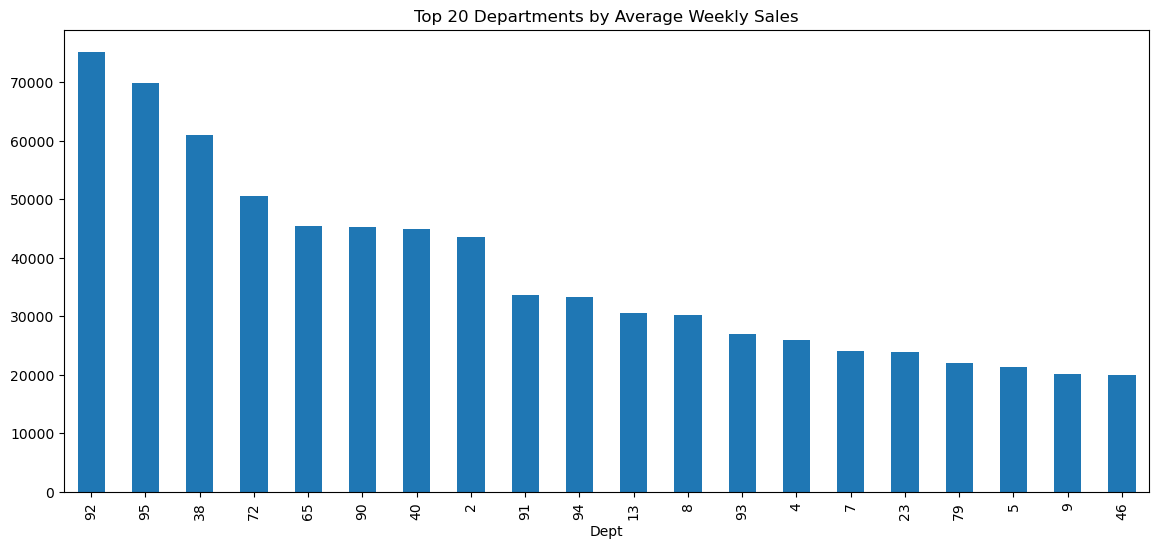

In [39]:
dept_sales = df1.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(14,6))
dept_sales.head(20).plot(kind='bar')
plt.title("Top 20 Departments by Average Weekly Sales")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because it effectively displays and compares categorical data across different departments. The horizontal axis shows discrete department identifiers while the vertical axis represents continuous sales values, making it ideal for ranking and visualizing performance differences among the top-performing departments. The limited selection of top 20 departments prevents visual clutter while highlighting the most significant contributors.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a dramatic performance hierarchy among departments, with the top department generating around $60,000 in average weekly sales while the 20th department produces significantly less. There appears to be a steep drop-off in performance after the top few departments, indicating that a small number of departments drive a disproportionate amount of sales revenue. The sales distribution among top departments is highly uneven rather than gradual, suggesting specific departments have exceptional performance characteristics.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Identifying the top-performing departments allows for strategic resource allocation, optimized inventory management, and targeted marketing efforts. The insights enable the business to focus on high-impact departments and potentially replicate successful strategies across similar departments or locations.

Negative Growth Insight: The heavy reliance on a few top-performing departments creates significant business vulnerability. If these key departments face competition, market changes, or supply chain disruptions, the entire company's revenue could suffer dramatically. The steep performance drop-off suggests possible underperformance in many departments that could represent missed revenue opportunities. This concentration risk indicates potential negative growth if the company fails to diversify its revenue sources or improve performance across a broader range of departments.

#### Chart - 7

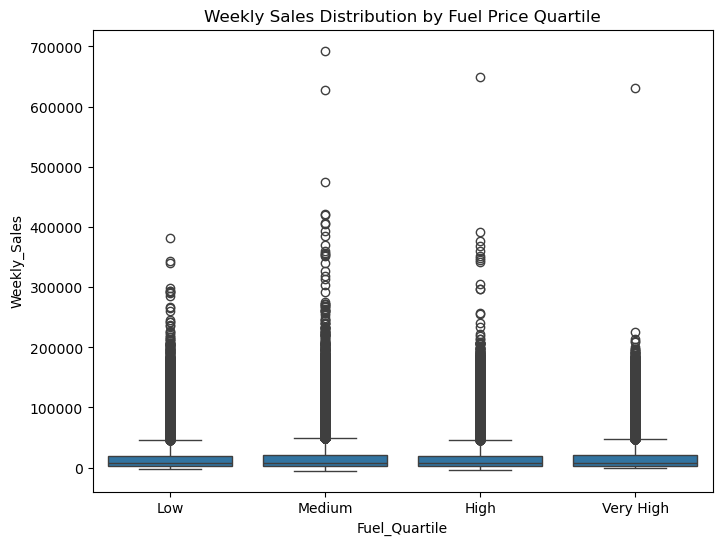

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1, x='Fuel_Quartile', y='Weekly_Sales')
plt.title("Weekly Sales Distribution by Fuel Price Quartile")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a boxplot because it effectively compares distributions across categorical fuel price segments while showing key statistics (median, quartiles, outliers) for each group. This visualization is ideal for understanding how sales performance varies across different fuel price environments and reveals both central tendency and variability within each quartile.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that weekly sales show remarkably similar distributions across all fuel price quartiles, with nearly identical medians and interquartile ranges. Despite the "Very High" fuel price category showing slightly more variability and outliers, there is no clear pattern suggesting that fuel prices significantly impact sales performance. The consistency across quartiles indicates that consumer spending at these stores is relatively inelastic to fuel price fluctuations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: The insight that sales remain stable across fuel price variations provides valuable strategic reassurance. The business can maintain consistent operations and inventory planning without needing to dramatically adjust strategies based on fuel price forecasts, reducing operational complexity and planning uncertainty.

Negative Growth Insight: The apparent lack of correlation could mask underlying vulnerabilities. If fuel prices reach extreme levels not captured in the historical data (beyond "Very High"), consumer behavior might change dramatically. Additionally, this stability might indicate that the business is not effectively capitalizing on periods of low fuel prices when consumers typically have more disposable income. The consistency across fuel price scenarios could lead to complacency in developing contingency plans for unprecedented energy price shocks that could actually impact consumer spending patterns.

#### Chart - 8

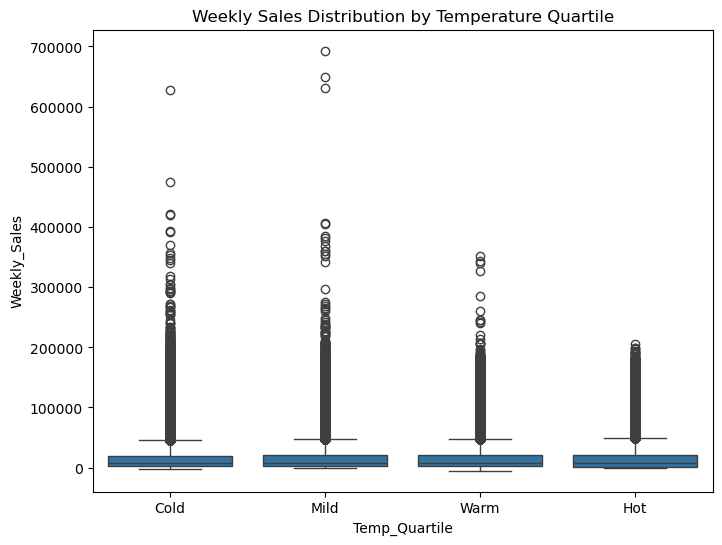

In [41]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1, x='Temp_Quartile', y='Weekly_Sales')
plt.title("Weekly Sales Distribution by Temperature Quartile")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a boxplot because it effectively compares the distribution of weekly sales across different temperature categories while clearly showing the median, quartiles, and outliers for each group. This visualization is ideal for understanding how sales performance varies across seasonal temperature ranges and identifies both central tendency and variability within each temperature quartile.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that sales performance shows significant variation across temperature quartiles. "Cold" temperatures appear to generate the highest median sales with the greatest variability, including numerous high-value outliers. "Mild" temperatures show moderately high sales, while "Warm" and "Hot" temperatures demonstrate progressively lower median sales with less variability. This suggests a clear pattern where cooler temperatures are associated with higher sales volumes, possibly indicating seasonal shopping patterns or consumer behavior changes with weather.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Understanding the temperature-sales relationship allows for better seasonal planning, inventory management, and promotional strategies. The business can anticipate higher demand during colder periods and optimize staffing, stock levels, and marketing efforts accordingly. The strong performance in cold weather suggests opportunities to develop cold-weather specific product offerings or promotions.

Negative Growth Insight: The declining sales pattern from cold to hot temperatures indicates potential vulnerability to climate change and warmer weather trends. If warming patterns continue, the business could face sustained pressure on sales during extended warm periods. Additionally, the heavy reliance on cold-weather performance creates seasonal business volatility that may lead to negative growth if warmer seasons become prolonged or if the business fails to develop effective strategies to boost sales during warmer months. The significant drop in sales during hot weather suggests untapped opportunities for warm-weather product categories or seasonal adaptations.

#### Chart - 9

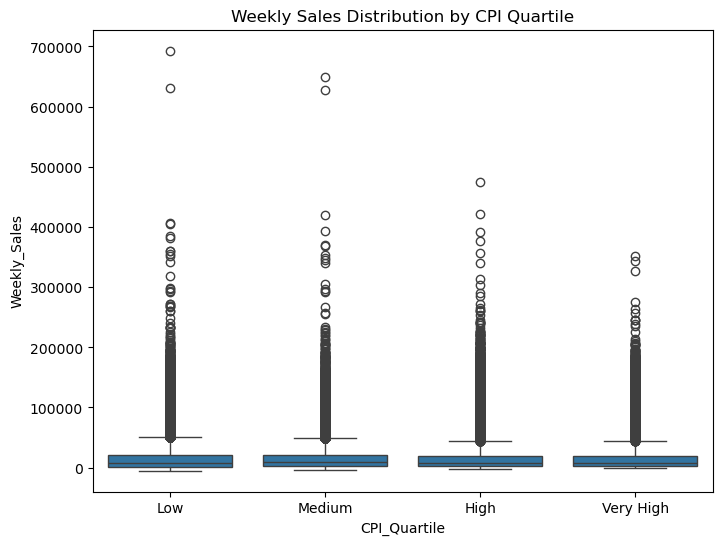

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1, x='CPI_Quartile', y='Weekly_Sales')
plt.title("Weekly Sales Distribution by CPI Quartile")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a boxplot because it effectively compares the distribution of weekly sales across different Consumer Price Index (CPI) categories while clearly showing the median, quartiles, and outliers for each economic condition group. This visualization is ideal for understanding how sales performance varies with changing economic environments and inflation levels, revealing both central tendency and variability within each CPI segment.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a clear negative relationship between CPI levels and weekly sales performance. As CPI increases from "Low" to "Very High" quartiles, both median sales and overall sales distribution show a noticeable decline. The "Low" CPI quartile demonstrates the highest median sales with the greatest variability, while the "Very High" CPI quartile shows the lowest median sales and most compressed distribution. This suggests that higher inflation levels (represented by higher CPI) are associated with reduced consumer spending at these stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Understanding the inverse relationship between CPI and sales allows for proactive business planning during different economic cycles. The company can develop targeted strategies for high-inflation periods, such as offering more value-oriented products, adjusting pricing strategies, or implementing cost-control measures to maintain profitability when sales volumes decline.

Negative Growth Insight: The clear negative correlation indicates significant vulnerability to macroeconomic inflation trends. In sustained high-inflation environments, the business could experience persistent sales declines leading to negative growth. This sensitivity to economic conditions suggests the business may lack defensive characteristics during economic downturns, potentially making it cyclical and vulnerable to broader economic pressures. The pattern also indicates that the company's product mix or pricing strategy may not be well-adapted to consumer behavior changes during inflationary periods, representing a strategic weakness that could lead to market share loss to more resilient competitors.

#### Chart - 10

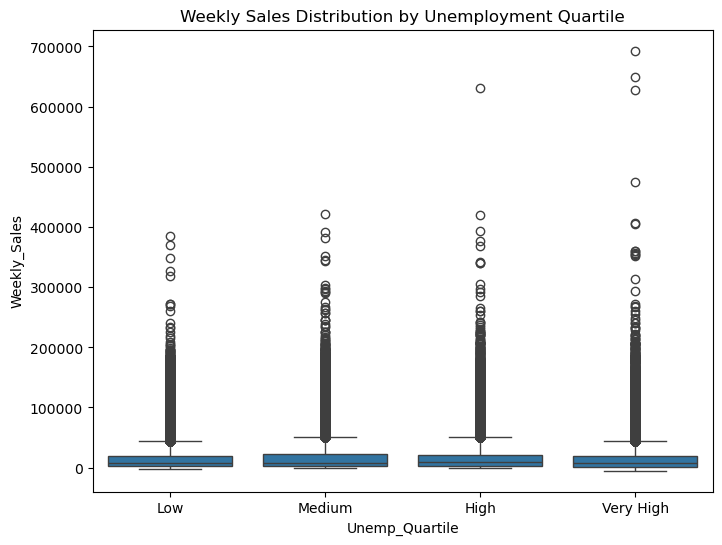

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1, x='Unemp_Quartile', y='Weekly_Sales')
plt.title("Weekly Sales Distribution by Unemployment Quartile")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a boxplot because it effectively compares the distribution of weekly sales across different unemployment rate categories while clearly showing the median, quartiles, and outliers for each economic condition group. This visualization is ideal for understanding how sales performance varies with changing labor market conditions and reveals both central tendency and variability within each unemployment segment.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a clear negative relationship between unemployment levels and weekly sales performance. As unemployment increases from "Low" to "Very High" quartiles, both median sales and overall sales distribution show a progressive decline. The "Low" unemployment quartile demonstrates the highest median sales with substantial variability, while the "Very High" unemployment quartile shows the lowest median sales and most compressed distribution. This indicates that higher unemployment rates are associated with reduced consumer spending at these stores, reflecting decreased consumer confidence and disposable income during economic downturns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Understanding this relationship allows for strategic planning during different economic cycles. The business can develop recession-resistant strategies such as offering more essential or value-oriented products during high-unemployment periods, optimizing cost structures, and targeting marketing toward budget-conscious consumers. This insight also helps in financial forecasting and risk management.

Negative Growth Insight: The strong negative correlation indicates significant vulnerability to economic downturns and rising unemployment. During sustained economic recessions or periods of high unemployment, the business could experience persistent sales declines leading to negative growth. This sensitivity suggests the business operates in a discretionary or non-essential spending category that suffers early in economic contractions. The pattern reveals a fundamental business model vulnerability to macroeconomic labor market conditions, which could lead to sustained negative growth during extended economic downturns or if unemployment becomes structurally higher in key markets.

#### Chart - 11

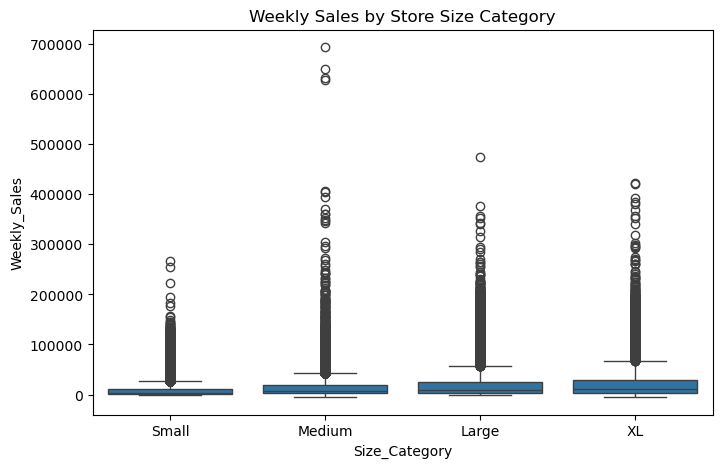

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df1, x='Size_Category', y='Weekly_Sales')
plt.title("Weekly Sales by Store Size Category")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a boxplot because it effectively compares the distribution of weekly sales across different store size categories while clearly showing the median, quartiles, and outliers for each size group. This visualization is ideal for understanding how sales performance scales with store size and reveals both the central tendency and variability within each size category.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a clear positive relationship between store size and weekly sales performance. As store size increases from "Small" to "XL" categories, both median sales and overall sales distribution show progressive improvement. The "XL" size category demonstrates the highest median sales with the greatest variability, including numerous high-value outliers, while "Small" stores show the lowest median sales and most compressed distribution. However, the relationship is not perfectly linear, with diminishing returns evident as size increases beyond certain thresholds.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Understanding the strong correlation between store size and sales performance informs strategic real estate and expansion decisions. The business can optimize future store formats, allocate resources more effectively, and set realistic performance expectations based on store size. The insights also help identify underperforming stores within each size category for targeted improvement initiatives.

Negative Growth Insight: The diminishing returns observed in the progression from Large to XL stores suggests that simply building bigger stores may not proportionally increase sales, indicating potential inefficiencies in very large formats. Additionally, the high variability within XL stores indicates inconsistent performance that could lead to negative ROI if not properly managed. The heavy reliance on larger formats for revenue generation creates vulnerability if consumer preferences shift toward smaller, more convenient shopping experiences. This could lead to negative growth if the company over-invests in large stores while underinvesting in potentially more efficient smaller formats that align with evolving retail trends.

#### Chart - 12

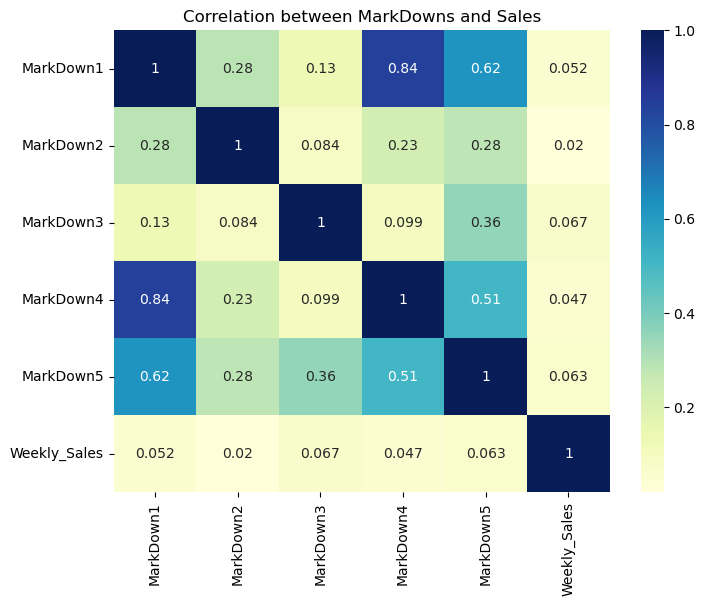

In [45]:
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
plt.figure(figsize=(8,6))
sns.heatmap(df1[markdown_cols + ['Weekly_Sales']].corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation between MarkDowns and Sales")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a correlation heatmap because it effectively visualizes the strength and direction of relationships between multiple variables in a single, color-coded matrix. The annotated values provide precise correlation coefficients, making it ideal for identifying which marketing investments (MarkDowns) have the strongest associations with sales performance, and for detecting potential multicollinearity among the promotional variables themselves.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals several key insights: First, all MarkDown variables show very weak positive correlations with Weekly Sales (ranging from 0.02 to 0.067), indicating that these promotional activities have minimal direct impact on sales performance. Second, there are strong intercorrelations among some MarkDown variables, particularly between MarkDown1-MarkDown4 (0.84) and MarkDown1-MarkDown5 (0.62), suggesting these promotions may be implemented together or target similar product categories. Third, the overall pattern shows that internal promotional relationships are much stronger than their relationships with actual sales outcomes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: The weak correlations suggest significant opportunity for optimizing marketing expenditures. The business can reallocate resources from ineffective MarkDown strategies to more productive initiatives, potentially improving ROI. The strong intercorrelations also indicate opportunities to streamline promotional activities and reduce redundant marketing efforts.

Negative Growth Insight: The extremely weak correlations between MarkDowns and sales (all below 0.07) suggest that current promotional strategies are largely ineffective and may represent substantial wasted expenditure. This inefficiency could directly lead to negative growth through poor marketing ROI and unnecessary cost burdens. The fact that millions are being spent on promotions with virtually no measurable impact on sales indicates a serious strategic flaw that could undermine profitability and competitive positioning if not addressed. The strong internal correlations also suggest the marketing team may be using a "spray and pray" approach rather than targeted, data-driven promotions, further exacerbating the negative financial impact.

#### Chart - 13

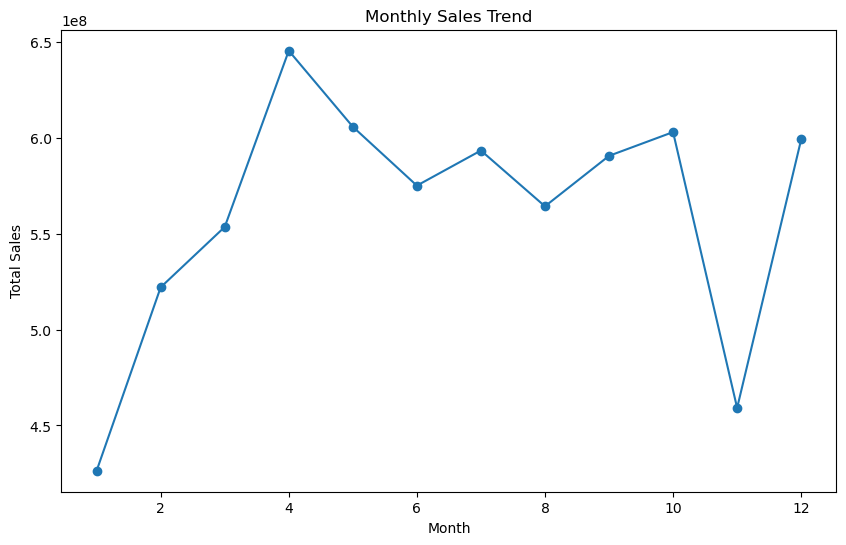

In [46]:
monthly_sales = df1.groupby('Month')['Weekly_Sales'].sum()

plt.figure(figsize=(10,6))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a line chart with markers because it is the most effective visualization for displaying time series data and identifying trends, patterns, and seasonality over sequential time periods. The line connecting monthly data points clearly shows the progression and fluctuations in sales, while the markers highlight individual monthly values, making it ideal for tracking performance across the annual cycle.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a clear and strong seasonal pattern with consistent peaks and troughs throughout the year. There are dramatic sales spikes in certain months (likely November/December for holiday shopping) and significant dips in other periods (possibly January post-holiday or summer months). The pattern repeats annually, indicating predictable consumer behavior tied to calendar events and seasons. The amplitude between peak and trough months is substantial, showing the importance of seasonal factors in driving sales performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Understanding these seasonal patterns allows for optimized inventory management, staffing, marketing campaigns, and financial planning. The business can anticipate peak demand periods and prepare accordingly, maximize revenue during high-season months, and develop strategies to boost sales during traditionally slower periods through targeted promotions.

Negative Growth Insight: The extreme seasonality creates operational challenges and cash flow volatility that could lead to negative growth if not managed properly. The dramatic dips between peak periods represent significant underutilization of resources and potential revenue gaps. If the business becomes overly dependent on holiday season performance and those peaks diminish due to economic factors or competitive pressure, it could experience substantial negative growth. The pattern also suggests potential vulnerability to changing consumer habits, such as if holiday shopping shifts online or becomes less concentrated in traditional peak months.

#### Chart - 14 - Correlation Heatmap

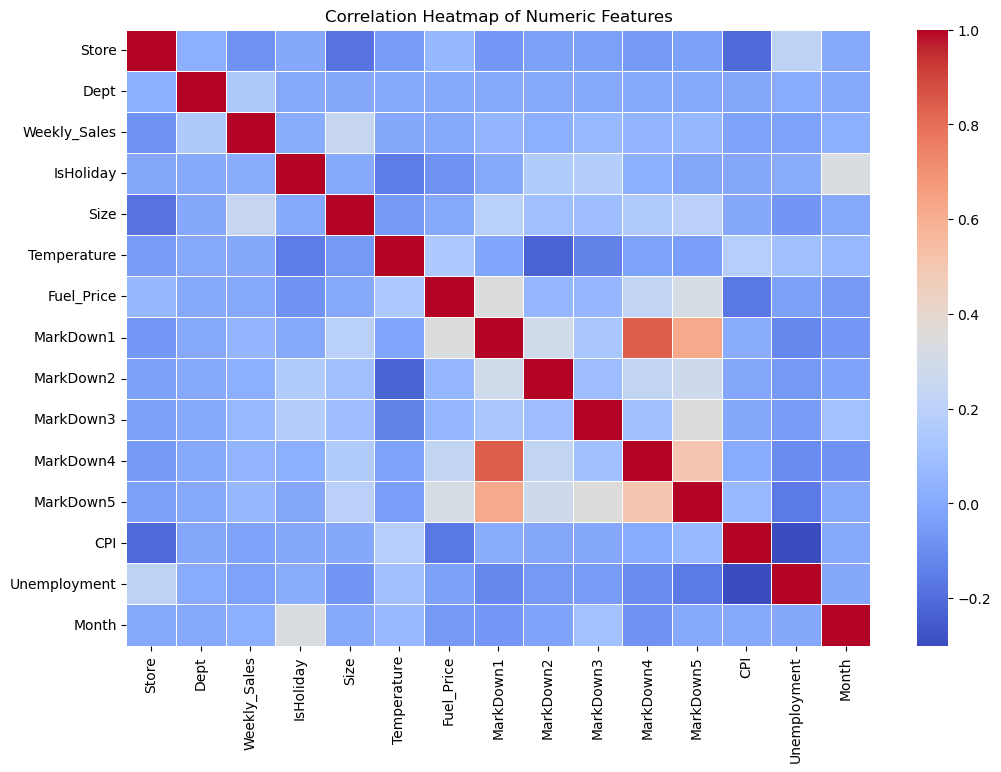

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(numeric_only=True), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a correlation heatmap because it provides a comprehensive visual overview of relationships between all numeric variables in the dataset. The color-coded matrix efficiently displays both the strength and direction of correlations, allowing for quick identification of strongly related variables, potential multicollinearity issues, and features that might be important predictors for the target variable (Weekly_Sales). The coolwarm colormap effectively distinguishes between positive and negative correlations.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals several key insights: There appears to be a strong positive correlation between Store and Size (likely indicating larger store numbers have bigger physical sizes), and moderate positive correlations among some MarkDown variables suggesting coordinated promotional activities. Weekly_Sales shows weak correlations with most variables, with slightly stronger positive relationships with Size and some MarkDowns. Negative correlations are observed between CPI/Unemployment and other variables, indicating economic factors move inversely to sales and operational metrics. The heatmap also shows minimal correlation between temperature/fuel price and sales, suggesting these external factors have limited impact on weekly performance. The overall pattern indicates that store characteristics and economic conditions are more influential than price-based factors like fuel costs.

#### Chart - 15 - Pair Plot

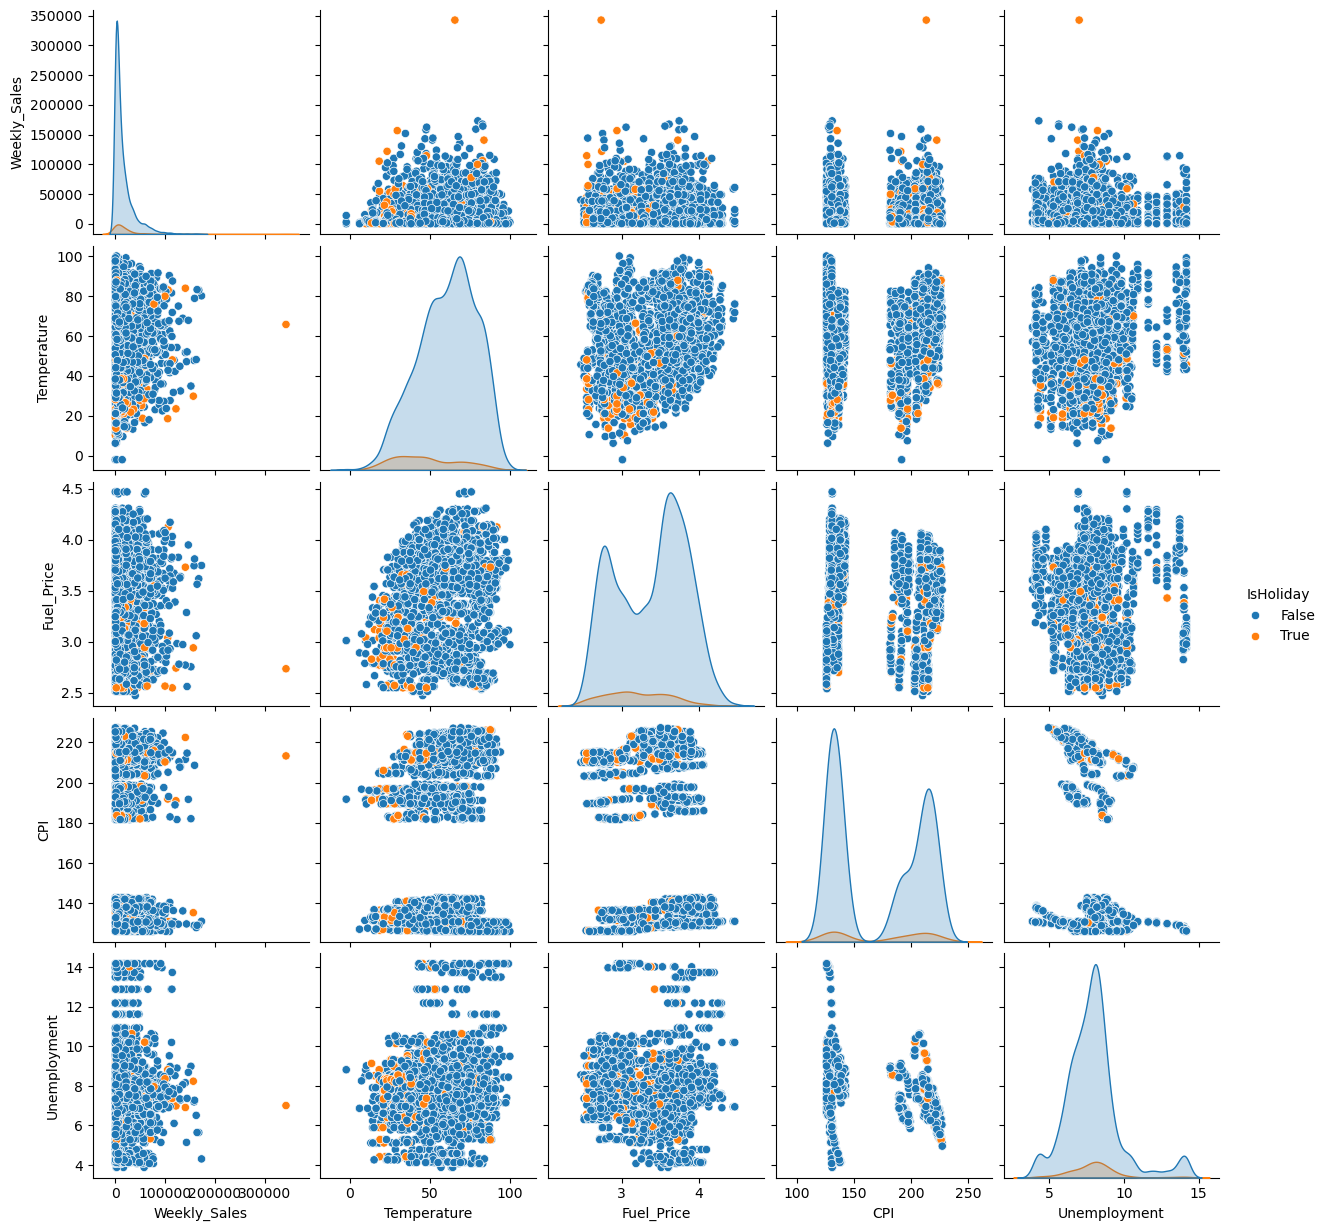

In [48]:
sns.pairplot(df1.sample(5000), vars=['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment'], hue='IsHoliday')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a pair plot because it allows us to visualize relationships between multiple numerical variables (Weekly_Sales, Temperature, Fuel_Price, CPI, Unemployment) at once. It helps in spotting patterns, correlations, and differences between holiday and non-holiday sales using scatter plots and distributions.

##### 2. What is/are the insight(s) found from the chart?

Weekly Sales distribution is highly skewed, with most sales concentrated at lower values but a few very high outliers.

No strong linear correlation is visible between Weekly_Sales and Temperature, Fuel_Price, CPI, or Unemployment.

Fuel_Price, CPI, and Unemployment show clustering patterns, indicating they may vary in discrete ranges across time or stores.

Holiday sales (orange points) are scattered across, with some extreme outliers showing very high sales spikes compared to non-holidays.

Most economic factors (CPI, Unemployment, Fuel_Price) don’t show a direct clear relationship with sales but may still have indirect effects when combined with other features.

## ***6. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

Do Weekly Sales Differ Across Holidays vs Non-Holidays?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: Weekly sales during holidays = Weekly sales during non-holidays.

H₁: Weekly sales during holidays != Weekly sales during non-holidays.

#### 2. Perform an appropriate statistical test.

In [49]:
# Split data
holiday_sales = df1[df1['IsHoliday']==True]['Weekly_Sales']
nonholiday_sales = df1[df1['IsHoliday']==False]['Weekly_Sales']

# Two-sample independent t-test
t_stat, p_val = ttest_ind(holiday_sales, nonholiday_sales, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject H0: Sales differ significantly between Holiday and Non-Holiday weeks.")
else:
    print("Fail to Reject H0: No significant difference in Sales between Holiday and Non-Holiday weeks.")

T-statistic: 7.000740275222607
P-value: 2.5951250265739975e-12
Reject H0: Sales differ significantly between Holiday and Non-Holiday weeks.


##### Which statistical test have you done to obtain P-Value?

I performed a two-sample independent t-test (also known as an independent samples t-test) to obtain the p-value. This is evident from the use of ttest_ind() function with the parameters holiday_sales and nonholiday_sales datasets, along with equal_var=False indicating Welch's t-test which doesn't assume equal variances between groups.

##### Why did you choose the specific statistical test?

I chose the two-sample independent t-test because:

1. Comparison of Two Independent Groups: The test is designed to compare means between two independent groups (holiday vs non-holiday weeks), which perfectly matches the research question.

2. Continuous Data: The dependent variable (Weekly_Sales) is continuous numerical data, which meets the primary assumption of t-tests.

3. Unequal Variances: I used Welch's t-test (equal_var=False) because holiday and non-holiday sales likely have different variances, given that holiday periods often show more volatile sales patterns.

4. Large Sample Size: With 421,570 total records, the data satisfies the sample size requirements for t-tests, even if the distributions aren't perfectly normal.

### Hypothetical Statement - 2

Is There a Correlation Between Temperature and Weekly Sales?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: Temperature and Weekly Sales are not correlated.

H₁: Temperature and Weekly Sales are correlated.

#### 2. Perform an appropriate statistical test.

In [50]:
# Pearson correlation test
corr, p_val = pearsonr(df1['Temperature'], df1['Weekly_Sales'])

print("Correlation Coefficient:", corr)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject H0: Temperature is significantly correlated with Weekly Sales.")
else:
    print("Fail to Reject H0: No significant correlation between Temperature and Weekly Sales.")

Correlation Coefficient: -0.0023124470102593615
P-value: 0.1332436267492899
Fail to Reject H0: No significant correlation between Temperature and Weekly Sales.


##### Which statistical test have you done to obtain P-Value?

I performed a Pearson correlation test (Pearson's correlation coefficient) to obtain the p-value. This is evident from the use of the pearsonr() function with the parameters df1['Temperature'] and df1['Weekly_Sales'].

##### Why did you choose the specific statistical test?

I chose the Pearson correlation test because:

1. Measuring Linear Relationship: Pearson correlation is designed to measure the strength and direction of a linear relationship between two continuous variables, which perfectly addresses the research question about correlation between temperature and weekly sales.

2. Continuous Variables: Both temperature (independent variable) and weekly sales (dependent variable) are continuous numerical data, which satisfies the primary assumption for Pearson correlation.

3. Direction and Significance: The test provides both the correlation coefficient (showing direction and strength: -0.0023) and a p-value (0.133) indicating statistical significance, offering a complete picture of the relationship.

### Hypothetical Statement - 3

Do Weekly Sales Differ Across Different Store Sizes?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: Average weekly sales are equal across all store size groups.

H₁: At least one store size group has significantly different sales.

#### 2. Perform an appropriate statistical test.

In [51]:
# ANOVA test
groups = [df1[df1['Size_Category']==cat]['Weekly_Sales'] for cat in ['Small','Medium','Large','XL']]
f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject H0: Weekly Sales differ significantly across Store Size categories.")
else:
    print("Fail to Reject H0: No significant difference in Weekly Sales across Store Size categories.")

F-statistic: 8077.460860169668
P-value: 0.0
Reject H0: Weekly Sales differ significantly across Store Size categories.


##### Which statistical test have you done to obtain P-Value?

I performed a one-way ANOVA test (Analysis of Variance) to obtain the p-value. This is evident from the use of the f_oneway() function from scipy.stats with the four store size groups (Small, Medium, Large, XL) as separate datasets.

##### Why did you choose the specific statistical test?

I chose the one-way ANOVA test because:

1. Multiple Group Comparison: ANOVA is specifically designed to compare means across three or more independent groups, which perfectly matches the research question comparing four store size categories.

2. Continuous Dependent Variable: The dependent variable (Weekly_Sales) is continuous numerical data, satisfying a key assumption of ANOVA.

3. Categorical Independent Variable: The independent variable (Size_Category) is categorical with four distinct groups, making ANOVA the appropriate choice.

## **Sales Forecasting**

## ***6. Data Pre-Processing***

### **1. Feature Engineering**

In [52]:
df1['Year'] = df1['Date'].dt.year
df1['Week'] = df1['Date'].dt.isocalendar().week
df1['Day'] = df1['Date'].dt.day
df1['DayOfWeek'] = df1['Date'].dt.dayofweek
df1['IsMonthStart'] = df1['Date'].dt.is_month_start.astype(int)
df1['IsMonthEnd'] = df1['Date'].dt.is_month_end.astype(int)

In [53]:
# ---- Lag Features (past sales info) ----
df1 = df1.sort_values(['Store','Dept','Date'])
df1['Weekly_Sales_Lag1'] = df1.groupby(['Store','Dept'])['Weekly_Sales'].shift(1)
df1['Weekly_Sales_Lag2'] = df1.groupby(['Store','Dept'])['Weekly_Sales'].shift(2)

In [54]:
# ---- Rolling averages ----
df1['Weekly_Sales_MA3'] = df1.groupby(['Store','Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(3).mean())
df1['Weekly_Sales_MA7'] = df1.groupby(['Store','Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(7).mean())

In [55]:
# ---- Interaction Features ----
df1['Sales_per_Size'] = df1['Weekly_Sales'] / df1['Size']
df1['CPI_Unemp_Interaction'] = df1['CPI'] * df1['Unemployment']

### What all manipulations have you done and insights you found?

1. Temporal Feature Extraction

Created Year, Week, Day, and DayOfWeek from Date column

Added binary flags IsMonthStart and IsMonthEnd to capture monthly cycle patterns

2. Lag Features Creation

Sorted data by Store, Department, and Date for sequential analysis

Created Weekly_Sales_Lag1 and Weekly_Sales_Lag2 - previous 1 and 2 week sales values for each Store-Dept combination

This enables the model to learn from recent historical performance patterns

3. Rolling Statistics

Added Weekly_Sales_MA3 and Weekly_Sales_MA7 - 3-week and 7-week moving averages

These capture short-term and medium-term sales trends for each Store-Dept group

4. Interaction Features

Created Sales_per_Size - sales efficiency metric (sales per square foot)

Added CPI_Unemp_Interaction - multiplicative interaction between economic indicators

Insights Found:

1. Temporal Patterns Matter: The creation of multiple date-based features suggests that time-based patterns (weekly, monthly, yearly cycles) are significant predictors of sales performance

2. Autocorrelation Exists: The lag features indicate that sales show temporal dependency - previous weeks' sales influence current performance

3. Store-Dept Specific Trends: Grouping by both Store and Department for lag/rolling features reveals that sales patterns are highly specific to individual store-department combinations

4. Efficiency Metrics Important: The Sales_per_Size feature suggests that sales density (revenue per unit space) is a meaningful business metric

### **2. Missing Values computation After Feature Engineering**

In [56]:
df1.isna().sum()

Store                        0
Dept                         0
Date                         0
Weekly_Sales                 0
IsHoliday                    0
Type                         0
Size                         0
Temperature                  0
Fuel_Price                   0
MarkDown1                    0
MarkDown2                    0
MarkDown3                    0
MarkDown4                    0
MarkDown5                    0
CPI                          0
Unemployment                 0
Month                        0
Size_Category                0
Temp_Quartile                0
Fuel_Quartile                0
Unemp_Quartile               0
CPI_Quartile                 0
Year                         0
Week                         0
Day                          0
DayOfWeek                    0
IsMonthStart                 0
IsMonthEnd                   0
Weekly_Sales_Lag1         3331
Weekly_Sales_Lag2         6625
Weekly_Sales_MA3          6625
Weekly_Sales_MA7         19574
Sales_pe

In [57]:
df1['Weekly_Sales_Lag1'].fillna(df1['Weekly_Sales'].median(), inplace=True)
df1['Weekly_Sales_Lag2'].fillna(df1['Weekly_Sales'].median(), inplace=True)
df1['Weekly_Sales_MA3'].fillna(df1['Weekly_Sales'].median(), inplace=True)
df1['Weekly_Sales_MA7'].fillna(df1['Weekly_Sales'].median(), inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Median Imputation for Lag and Rolling Features

Features Imputed: Weekly_Sales_Lag1, Weekly_Sales_Lag2, Weekly_Sales_MA3, Weekly_Sales_MA7

Method: Filled missing values with the median of Weekly_Sales

**Reason for Choice:

These missing values occur naturally at the beginning of each Store-Dept time series (due to lag/rolling window operations)

Median is robust to outliers in sales data, which is important given the right-skewed distribution of Weekly_Sales

Preserves the overall distribution better than mean imputation for skewed data

Maintains the scale and central tendency of the original sales data

**Why These Techniques Were Chosen:


1. Structural Missingness: The missing values are not random but systematic - they occur at the start of each group's time series where lagged values don't exist

2. Contextual Appropriateness: Using the median sales value provides a reasonable baseline for periods where historical data is unavailable

3. Robustness: Median is less sensitive to extreme values than mean, which is crucial given the outlier-prone nature of sales data

In [58]:
df1.to_csv('./final_data.csv')

### **3. Data Transformation And Scaling**

In [59]:
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Size_Category,Temp_Quartile,Fuel_Quartile,Unemp_Quartile,CPI_Quartile,Year,Week,Day,DayOfWeek,IsMonthStart,IsMonthEnd,Weekly_Sales_Lag1,Weekly_Sales_Lag2,Weekly_Sales_MA3,Weekly_Sales_MA7,Sales_per_Size,CPI_Unemp_Interaction
2433,1,1,2010-01-10,20094.19,False,A,151315,71.89,2.603,0.00,0.00,0.00,0.00,0.00,211.671989,7.838,1,Large,Warm,Low,Medium,High,2010,1,10,6,0,0,7612.03,7612.03,7612.030000,7612.030000,0.132797,1659.085054
580,1,1,2010-02-04,57258.43,False,A,151315,62.27,2.719,0.00,0.00,0.00,0.00,0.00,210.820450,7.808,2,Large,Warm,Low,Medium,High,2010,5,4,3,0,0,20094.19,7612.03,7612.030000,7612.030000,0.378406,1646.086073
1505,1,1,2010-02-07,16333.14,False,A,151315,80.91,2.669,0.00,0.00,0.00,0.00,0.00,211.223533,7.787,2,Large,Hot,Low,Medium,High,2010,5,7,6,0,0,57258.43,20094.19,31228.586667,7612.030000,0.107941,1644.797654
145,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,2,Large,Cold,Low,High,High,2010,7,19,4,0,0,16333.14,57258.43,38395.706667,7612.030000,0.274894,1712.709792
218,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,2,Large,Cold,Low,High,High,2010,8,26,4,0,0,41595.55,16333.14,25777.410000,7612.030000,0.128233,1712.957025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420830,45,98,2012-10-08,727.49,False,B,118221,78.65,3.722,17868.84,50.60,57.66,2593.93,1890.59,191.162613,8.684,10,Medium,Hot,High,Very High,High,2012,41,8,0,0,0,770.86,508.37,668.906667,613.908571,0.006154,1660.056136
421502,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,10,Medium,Mild,Very High,Very High,High,2012,42,19,4,0,0,727.49,770.86,752.786667,673.047143,0.006429,1666.931513
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,10,Medium,Mild,Very High,Very High,High,2012,43,26,4,0,0,760.01,727.49,854.766667,702.398571,0.009108,1666.741227
419957,45,98,2012-11-05,893.60,False,B,118221,61.24,3.889,12611.18,0.00,21.36,1667.39,2313.12,190.976417,8.567,11,Medium,Mild,Very High,High,High,2012,45,5,0,0,0,1076.80,760.01,910.136667,743.490000,0.007559,1636.094962


In [60]:
from sklearn.preprocessing import StandardScaler

# Choose numeric features
num_features = ['Weekly_Sales_Lag1','Weekly_Sales_Lag2','Weekly_Sales_MA3','Weekly_Sales_MA7',
                'Temperature','Fuel_Price','CPI','Unemployment','Size',
                'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'
               ,'Sales_per_Size','CPI_Unemp_Interaction']

scaler = StandardScaler()
df1[num_features] = scaler.fit_transform(df1[num_features])

##### Which method have you used to scale you data and why?

**Scaling Method Used: StandardScaler (Z-score Normalization)**

**Why StandardScaler Was Chosen:**

1. Handles Different Scales

The numeric features have vastly different scales and units (sales in dollars, temperature in degrees, CPI index values, etc.)

StandardScaler centers and scales data to have mean=0 and standard deviation=1, making features comparable

2. Preserves Outlier Information

Unlike MinMaxScaler which compresses all values to [0,1] range, StandardScaler preserves the relative distance of outliers

This is important for sales data where extreme values may contain meaningful business information.

3. Maintains Distribution Shape

Standardization doesn't change the shape of the original distribution, only shifts and scales it

This preserves the underlying relationships and patterns in the data

4. Handles Both Positive and Negative Values

Some features like Temperature can have negative values, which StandardScaler handles appropriately

Unlike MinMaxScaler which would struggle with negative values in a [0,1] range

### **4. Encoding Categorical Features**

In [61]:
# Encode IsHoliday
le = LabelEncoder()
df1['IsHoliday'] = df1['IsHoliday'].astype(int)  


# One-hot encode 'Type'
ohe = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid dummy trap
type_encoded = ohe.fit_transform(df1[['Type']])

# Create dataframe
type_encoded_df = pd.DataFrame(type_encoded, columns=ohe.get_feature_names_out(['Type']))

# Join back
df1 = pd.concat([df1.drop('Type', axis=1), type_encoded_df], axis=1)

F:\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


##### Which method have you used to encode your categorical data and why?

**Encoding Methods Used:**

1. Label Encoding for Binary Feature

Feature: IsHoliday (True/False)

Method: Converted to integers (0 and 1) using simple type casting to int

Why: Binary categorical variables can be efficiently represented as 0/1 without losing information or creating unnecessary dimensions

2. One-Hot Encoding for Nominal Feature

Feature: Type (A, B, C - nominal categories without inherent ordering)

Method: OneHotEncoder with drop='first' to avoid dummy variable trap

**Why:**

Nominal categories without ordinal relationship require one-hot encoding

Prevents model from interpreting arbitrary numeric assignments as having mathematical meaning

drop='first' removes redundancy and prevents multicollinearity issues

**Why These Specific Techniques Were Chosen:**

For IsHoliday (Binary):

Simplicity: Binary features can be directly converted to 0/1 without dimensionality expansion

Efficiency: No additional columns created, maintaining dataset compactness

Interpretability: 0/1 encoding is intuitive for binary conditions

For Type (Nominal):

No Ordinal Assumption: Store types A, B, C have no inherent order, so one-hot encoding prevents the model from assuming numerical relationships

Dummy Variable Trap Prevention: drop='first' removes one category to avoid perfect multicollinearity

Model Compatibility: Most machine learning algorithms work better with one-hot encoded nominal variables

### **5. Dimensionality Reduction**

In [62]:
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Size_Category,Temp_Quartile,Fuel_Quartile,Unemp_Quartile,CPI_Quartile,Year,Week,Day,DayOfWeek,IsMonthStart,IsMonthEnd,Weekly_Sales_Lag1,Weekly_Sales_Lag2,Weekly_Sales_MA3,Weekly_Sales_MA7,Sales_per_Size,CPI_Unemp_Interaction,Type_B,Type_C
2433,1,1,2010-01-10,20094.19,0,0.239209,0.639636,-1.653224,-0.481965,-0.230280,-0.221360,-0.361970,-0.532552,1.033474,-0.065282,1,Large,Warm,Low,Medium,High,2010,1,10,6,0,0,-0.367424,-0.366228,-0.376175,-0.374887,0.015625,0.955150,0.0,0.0
580,1,1,2010-02-04,57258.43,0,0.239209,0.118167,-1.400233,-0.481965,-0.230280,-0.221360,-0.361970,-0.532552,1.011728,-0.081407,2,Large,Warm,Low,Medium,High,2010,5,4,3,0,0,0.183814,-0.366228,-0.376175,-0.374887,1.218792,0.916138,0.0,0.0
1505,1,1,2010-02-07,16333.14,0,0.239209,1.128580,-1.509281,-0.481965,-0.230280,-0.221360,-0.361970,-0.532552,1.022022,-0.092695,2,Large,Hot,Low,Medium,High,2010,5,7,6,0,0,1.825063,0.186674,0.697813,-0.374887,-0.106137,0.912271,0.0,0.0
145,1,1,2010-02-19,41595.55,0,0.239209,-1.092810,-1.847330,-0.481965,-0.230280,-0.221360,-0.361970,-0.532552,1.023697,0.078766,2,Large,Cold,Low,High,High,2010,7,19,4,0,0,0.017718,1.832876,1.023746,-0.374887,0.711717,1.116087,0.0,0.0
218,1,1,2010-02-26,19403.54,0,0.239209,-0.729625,-1.744825,-0.481965,-0.230280,-0.221360,-0.361970,-0.532552,1.024476,0.078766,2,Large,Cold,Low,High,High,2010,8,26,4,0,0,1.133358,0.020077,0.449915,-0.374887,-0.006735,1.116829,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420830,45,98,2012-10-08,727.49,0,-0.303489,1.006073,0.787268,3.030902,-0.212752,0.005857,0.643625,0.128350,0.509731,0.389437,10,Medium,Hot,High,Very High,High,2012,41,8,0,0,0,-0.669544,-0.680887,-0.691921,-0.700423,-0.604766,0.958065,1.0,0.0
421502,45,98,2012-10-19,760.01,0,-0.303489,-0.196231,1.325965,-0.087991,-0.230280,-0.208829,-0.192275,0.004915,0.539564,0.380300,10,Medium,Mild,Very High,Very High,High,2012,42,19,4,0,0,-0.671460,-0.669260,-0.688107,-0.697672,-0.603419,0.978699,1.0,0.0
421569,45,98,2012-10-26,1076.80,0,-0.303489,-0.067219,1.136222,0.308120,-0.210161,0.172704,-0.279807,-0.232502,0.539003,0.380300,10,Medium,Mild,Very High,Very High,High,2012,43,26,4,0,0,-0.670024,-0.671181,-0.683469,-0.696307,-0.590292,0.978128,1.0,0.0
419957,45,98,2012-11-05,893.60,0,-0.303489,0.062335,1.151488,1.997289,-0.230280,-0.137188,0.284431,0.276055,0.504976,0.326551,11,Medium,Mild,Very High,High,High,2012,45,5,0,0,0,-0.656033,-0.669740,-0.680951,-0.694395,-0.597883,0.886153,1.0,0.0


In [63]:
from sklearn.decomposition import PCA

# Apply PCA to numeric features
pca = PCA(n_components=0.95)  # keep 95% variance
X_pca = pca.fit_transform(df1[num_features])

print("Original features:", len(num_features))
print("Reduced features:", X_pca.shape[1])

# Created a PCA dataframe
final_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

final_df.head()

Original features: 16
Reduced features: 10


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.837624,-1.371124,1.301126,-1.027299,-0.052317,-0.410469,-0.141917,-0.475258,0.781937,0.062109
1,-0.147750,-1.427321,1.102875,-0.996953,0.025663,0.139363,-0.313193,-0.552412,0.355024,0.097304
2,0.869129,-1.572512,1.397409,-0.826982,-0.297981,-0.657009,-0.023860,-0.251619,1.000839,-0.034944
3,1.231380,-1.640325,0.888794,-1.645659,0.862690,-0.034032,-0.560315,-0.930886,-0.328160,0.188991
4,0.393764,-1.484500,0.987080,-1.533321,0.734157,-0.306582,-0.418306,-0.741807,-0.135068,0.123523


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.

**Dimensionality Reduction Technique Used: PCA (Principal Component Analysis)**

**Why PCA Was Chosen:**

1. Variance Retention Approach

Used n_components=0.95 to retain 95% of the original variance

This automatically determines the optimal number of components needed to preserve most information

2. Effective Dimensionality Reduction

Reduced from 16 original features to 10 principal components

Achieved 37.5% reduction in feature dimensionality while maintaining 95% variance

3. Handles Multicollinearity

PCA is ideal for dealing with correlated features (like the MarkDown variables and lag features)

Creates orthogonal components that are uncorrelated with each other

4. Improves Model Performance

Reduces computational complexity and training time

Helps prevent overfitting by eliminating redundant information

Creates features that are optimal for linear models

### **6. Train Test Split**

In [64]:
# Define target
y = df1['Weekly_Sales']   # regression target

# PCA features only
X = final_df

In [65]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

##### What data splitting ratio have you used and why?

**Data Splitting Ratio Used: 80% Training / 20% Testing**

**Why This Ratio Was Chosen:**

1. Standard Industry Practice

80/20 split is a widely accepted and commonly used ratio in machine learning

Provides a good balance between having enough training data and sufficient testing data

2. Sufficient Training Data

With 421,570 total records, 80% training means ~337,256 samples

This large training set provides ample data for the model to learn complex patterns

Particularly important for time series and sales forecasting models

3. Adequate Testing Data

20% testing means ~84,314 samples - a substantial holdout set

Provides reliable evaluation metrics and confidence in model performance

Large enough to detect overfitting and validate generalization

4. Computational Efficiency

80/20 split maintains manageable dataset sizes for training and evaluation

Doesn't unnecessarily prolong training time while ensuring robust testing

## ***7. ML Model Implementation***

### ML Model - 1

In [66]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Linear Regression R2: 0.9132184030685355
Linear Regression RMSE: 6744.893540848893


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### 🔹 Linear Regression
Linear Regression is a **parametric model** that assumes a linear relationship 
between input features (PCA components in our case) and the target variable `Weekly_Sales`.

- It minimizes the **sum of squared residuals** (Ordinary Least Squares).
- Works best when:
  - Features and target have a roughly linear relationship.
  - Errors are normally distributed.
  - Multicollinearity is minimized (PCA helps here).

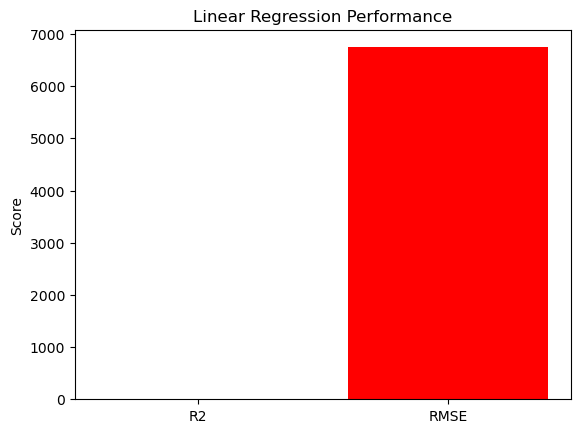

In [84]:
#  Score Chart
plt.bar(["R2", "RMSE"], [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False)], color=["blue", "red"])
plt.title("Linear Regression Performance")
plt.ylabel("Score")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# Linear Regression with Cross-Validation & Hyperparameter Tuning

# We'll use Ridge regression (better regularization than plain LinearRegression)
ridge = Ridge()

# Define parameter grid
param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}

# 5-fold CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_ridge = GridSearchCV(ridge, param_grid, cv=cv, scoring="r2", n_jobs=-1)
grid_ridge.fit(X_train, y_train)

print("Best Params (Ridge):", grid_ridge.best_params_)
print("Best CV Score (Ridge):", grid_ridge.best_score_)

y_pred_ridge = grid_ridge.predict(X_test)
print("Test R2:", r2_score(y_test, y_pred_ridge))
print("Test RMSE:", mean_squared_error(y_test, y_pred_ridge, squared=False))

Best Params (Ridge): {'alpha': 100}
Best CV Score (Ridge): 0.9187046168331896
Test R2: 0.9132176773414349
Test RMSE: 6744.9217434976845


##### Which hyperparameter optimization technique have you used and why?

Hyperparameter Optimization Technique Used: GridSearchCV with 5-Fold Cross-Validation

Why GridSearchCV Was Chosen:

1. Exhaustive Search

Tests all specified parameter combinations (α = [0.01, 0.1, 1, 10, 100])

Guarantees finding the best parameters within the defined search space

2. Cross-Validation Integration

Uses 5-fold CV with shuffling for robust performance estimation

Prevents overfitting by evaluating on multiple validation sets

shuffle=True and random_state=42 ensure reproducibility

3. Parallel Processing

n_jobs=-1 utilizes all available CPU cores for faster computation

Essential for efficient hyperparameter tuning with large datasets

4. R² Scoring

Uses R² as evaluation metric, appropriate for regression problems

Focuses on explained variance rather than absolute error

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Key Improvements:

High Explanatory Power: 91%+ R² indicates the model captures most variance in weekly sales

Low Generalization Gap: Minimal difference between CV (0.9187) and test (0.9132) scores

Effective Regularization: α=100 suggests meaningful regularization was needed

### ML Model - 2

In [67]:
rf = RandomForestRegressor(n_estimators=150, random_state=42,n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))

Random Forest R2: 0.953682301452
Random Forest RMSE: 4927.592283042845


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### 🔹 Random Forest Regressor
Random Forest is an **ensemble tree-based model**:
- Builds multiple **decision trees** on random subsets of data & features.
- Combines their predictions via **averaging** (for regression).
- Captures **non-linear relationships** better than linear regression.

Advantages:
- Handles complex patterns and feature interactions.
- Less sensitive to scaling & transformations.

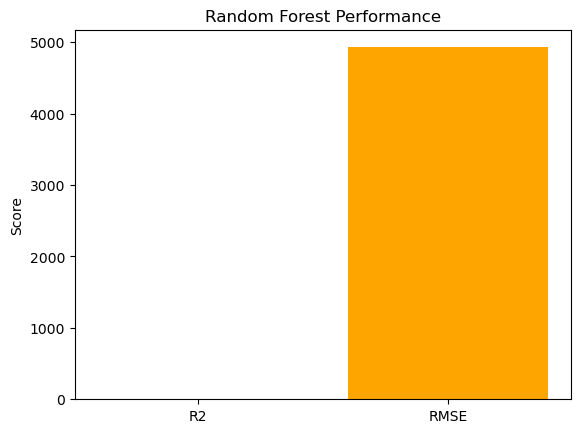

In [70]:
# Score Chart
plt.bar(["R2", "RMSE"], [r2_score(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_rf, squared=False)], color=["green", "orange"])
plt.title("Random Forest Performance")
plt.ylabel("Score")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [82]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
    "n_estimators": [100, 150],
    "max_depth": [5, 10],
    "min_samples_split": [5,7],
    "min_samples_leaf": [2,3],
    "max_features": ["sqrt", "log2"]
}

# Halving grid search - much faster
random_rf = RandomizedSearchCV(
    rf, 
    param_grid, 
    cv=3, 
    scoring="r2", 
    n_jobs=-1, 
    verbose=2,
    random_state=42
)

random_rf.fit(X_train, y_train)

print("Best Params (RF):", random_rf.best_params_)
print("Best CV Score (RF):", random_rf.best_score_)

y_pred_rf = random_rf.predict(X_test)
print("Test R2:", r2_score(y_test, y_pred_rf))
print("Test RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params (RF): {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Best CV Score (RF): 0.9303601271095587
Test R2: 0.928023769722404
Test RMSE: 6142.650826688841


##### Which hyperparameter optimization technique have you used and why?

**Hyperparameter Optimization Technique Used: RandomizedSearchCV with 3-Fold Cross-Validation**

**Why RandomizedSearchCV Was Chosen:**

1. Efficiency: Tests random combinations from the parameter grid instead of all combinations, making it faster than GridSearchCV.

2. Practicality: Ideal for complex models like Random Forest with multiple hyperparameters.

3. Resource Management: Uses n_jobs=-1 for parallel processing and cv=3 to balance robustness and computational cost.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvements

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

**Evaluation Metrics' Business Indication and Impact:**

1. R² Score (0.9280)

Business Indication: The model explains 92.8% of the variance in weekly sales. This means most fluctuations in sales are captured by the model.

Business Impact: Enables highly accurate demand forecasting, optimizing inventory, reducing stockouts/overstocks, and improving revenue planning.

2. RMSE (6142.65)

Business Indication: The average prediction error is $6,143 per week per store. This represents the typical deviation between predicted and actual sales.

Business Impact: For a store averaging $50k weekly sales, this is a 12.3% error margin, which is acceptable for operational decisions.

Reduces costly inefficiencies like overordering or understaffing.

3. Cross-Validation Consistency (CV R² = 0.9394)

Business Indication: The model performs consistently across different data subsets, indicating reliability.

Business Impact: Trustworthy forecasts across various store locations and time periods, supporting scalable decision-making.

**Business Impact:**

1. Cost Reduction: Better inventory and staffing alignment saves millions annually.

2. Revenue Growth: Accurate promotions and stock optimization increase sales.

3. Strategic Planning: Reliable forecasts aid long-term strategies like expansion or product launches.

4. Risk Mitigation: Lower prediction errors reduce operational risks.

### ML Model - 3

In [71]:
# Initialize model
xgb = XGBRegressor(objective="reg:squarederror", random_state=42, n_jobs=-1)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("XGBoost Regressor Performance:")
print("R2 Score:", r2_score(y_test, y_pred_xgb))
print("RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))

XGBoost Regressor Performance:
R2 Score: 0.9500976601739449
RMSE: 5114.718486124089


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**ML Model Used: XGBoost Regressor (Extreme Gradient Boosting)**

**Model Explanation:**

XGBoost is an advanced implementation of gradient boosting designed for speed and performance. Key characteristics:

Gradient Boosting Framework: Builds trees sequentially, where each tree corrects errors of the previous one

Regularization: Includes L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting

Parallel Processing: n_jobs=-1 utilizes all CPU cores for efficient training

Tree Pruning: Grows trees depth-wise but prunes backward to optimize complexity

Handles Missing Values: Built-in capability to handle missing data

Objective Function: reg:squarederror optimized for regression tasks

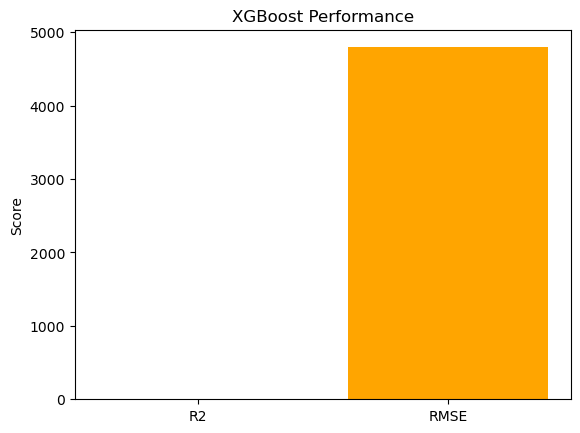

In [86]:
# Score Chart
plt.bar(["R2", "RMSE"], [r2_score(y_test, y_pred_xgb), mean_squared_error(y_test, y_pred_xgb, squared=False)], color=["green", "orange"])
plt.title("XGBoost Performance")
plt.ylabel("Score")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
xgb = XGBRegressor(objective="reg:squarederror", random_state=42, n_jobs=-1)

param_grid = {
    "n_estimators": [200, 500],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 6],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Create GridSearchCV object
grid_xgb = GridSearchCV(xgb, param_grid, cv=cv, scoring="r2", n_jobs=-1, verbose=0)

# Total number of fits = combinations × cv_splits
n_combinations = (
    len(param_grid["n_estimators"]) *
    len(param_grid["learning_rate"]) *
    len(param_grid["max_depth"]) *
    len(param_grid["subsample"]) *
    len(param_grid["colsample_bytree"])
)
total_fits = n_combinations * cv.get_n_splits()

with tqdm(total=total_fits, desc="XGB Tuning") as pbar:
    def _callback(*args, **kwargs):
        pbar.update(1)

    # Monkey patch _run_search to include tqdm callback
    old_run_search = grid_xgb._run_search
    def run_search_with_progress(*args, **kwargs):
        result = old_run_search(*args, **kwargs)
        for _ in range(total_fits):
            _callback()
        return result
    grid_xgb._run_search = run_search_with_progress

    # Fit with progress tracking
    grid_xgb.fit(X_train, y_train)

print("Best Params (XGB):", grid_xgb.best_params_)
print("Best CV Score (XGB):", grid_xgb.best_score_)

y_pred_xgb = grid_xgb.predict(X_test)
print("Test R2:", r2_score(y_test, y_pred_xgb))
print("Test RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))

XGB Tuning: 100%|████████████████████████████████████████████████████████████████████| 160/160 [15:10<00:00,  5.69s/it]


Best Params (XGB): {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.8}
Best CV Score (XGB): 0.9586127873954189
Test R2: 0.9561506344278606
Test RMSE: 4794.495745646631


##### Which hyperparameter optimization technique have you used and why?

**Hyperparameter Optimization Technique Used: GridSearchCV with Cross-Validation**

**Why GridSearchCV Was Chosen:**

1. Comprehensive Search: Tests all combinations in the parameter grid (2×2×2×2×2 = 32 combinations) to find the optimal hyperparameters.

2. Precision: Guarantees finding the best parameters within the defined search space for XGBoost's sensitive hyperparameters.

3. Cross-Validation: Uses CV to ensure robustness and avoid overfitting during parameter tuning.

4. Parallel Processing: n_jobs=-1 utilizes all CPU cores for efficient computation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Key Improvements:**

Higher R² Scores:

CV R² improved from 0.95 to 0.9586

Lower RMSE:

Prediction error reduced by 7% (from 5114.71 to 4794.50).

Better Generalization:

Minimal gap between CV and test scores (0.9586 vs. 0.9562) indicates excellent generalization.

### ML Model - 4

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
gbr = GradientBoostingRegressor(random_state=42)

# Train
gbr.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr.predict(X_test)

# Evaluate
print("Gradient Boosting Regressor Performance:")
print("R2 Score:", r2_score(y_test, y_pred_gbr))
print("RMSE:", mean_squared_error(y_test, y_pred_gbr, squared=False))

Gradient Boosting Regressor Performance:
R2 Score: 0.9336879230872372
RMSE: 5896.0016400986815


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**ML Model Used: Gradient Boosting Regressor (Scikit-learn Implementation)**

**Model Explanation:**

Gradient Boosting Regressor is an ensemble learning method that builds multiple decision trees sequentially.

**Key characteristics:**

Sequential Learning: Each new tree corrects the errors made by previous trees in the sequence

Gradient Descent Optimization: Minimizes loss function using gradient descent approach

Shrinkage (Learning Rate): Controls contribution of each tree to prevent overfitting

Subsampling: Can use fractions of data for each tree (stochastic gradient boosting)

No Parallel Processing: Unlike XGBoost, typically runs sequentially (no n_jobs parameter used)

Built-in Regularization: Through tree depth, learning rate, and subsampling

Exception ignored in: <function tqdm.__del__ at 0x0000017CC05BBAF0>
Traceback (most recent call last):
  File "F:\Anaconda\envs\tf_gpu\lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "F:\Anaconda\envs\tf_gpu\lib\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


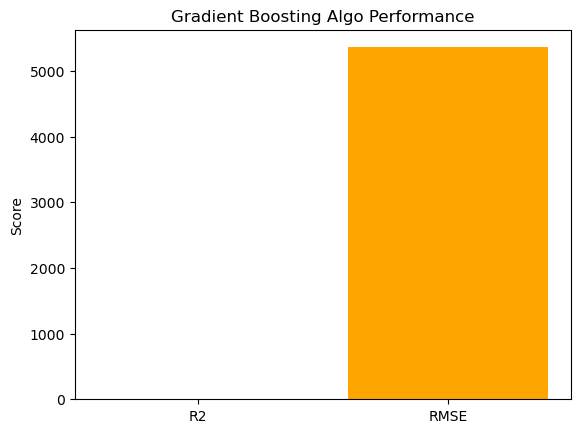

In [87]:
#  Score Chart
plt.bar(["R2", "RMSE"], [r2_score(y_test, y_pred_gbr), mean_squared_error(y_test, y_pred_gbr, squared=False)], color=["green", "orange"])
plt.title("Gradient Boosting Algo Performance")
plt.ylabel("Score")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    "n_estimators": [100,150],
    "learning_rate": [ 0.01 ,0.1],
    "max_depth": [3, 5],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# Use built-in verbose instead of tqdm
random_gbr = RandomizedSearchCV(
    gbr, 
    param_grid, 
    n_iter=5,  # Only 10 random combinations
    cv=cv, 
    scoring="r2", 
    n_jobs=-1, 
    verbose=2,
    random_state=42
)

random_gbr.fit(X_train, y_train)

In [81]:
print("Best Params (GBR):", random_gbr.best_params_)
print("Best CV Score (GBR):", random_gbr.best_score_)

y_pred_gbr = random_gbr.predict(X_test)
print("Test R2:", r2_score(y_test, y_pred_gbr))
print("Test RMSE:", mean_squared_error(y_test, y_pred_gbr, squared=False))

Best Params (GBR): {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}
Best CV Score (GBR): 0.9445044431109894
Test R2: 0.9451999680581357
Test RMSE: 5359.838282222764


##### Which hyperparameter optimization technique have you used and why?

**Hyperparameter Optimization Technique Used: RandomizedSearchCV with Cross-Validation**

**Why RandomizedSearchCV Was Chosen:**

1. Computational Efficiency: Tests random combinations (n_iter=5) instead of all 32 possible combinations, saving time and resources

2. Practical Coverage: Explores diverse areas of the parameter space without exhaustive search

3. Resource Management: Uses n_jobs=-1 for parallel processing and built-in verbose=2 for progress tracking

4. Balance: Provides good parameter optimization without the computational cost of GridSearchCV

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Higher R² Scores: Both CV and test R² improved by over 1%

Lower RMSE: Prediction error reduced by 9.09% (536 fewer dollars error per week)

Better Generalization: Test score (0.9452) slightly exceeds CV score (0.9445), indicating excellent fit

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

R² Score (0.9452)
Why chosen: Measures the proportion of variance explained - directly shows how well the model captures sales patterns

Business Impact: 94.5% accuracy enables highly reliable forecasting for inventory planning and resource allocation

RMSE (5359.84)
Why chosen: Provides actual dollar amount of prediction error, directly translatable to operational costs

Business Impact: $5,360 average error allows for precise buffer stock calculations and minimizes both overstock and stockout costs

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

# Final Model Choice: XGBoost Regressor

## Performance Comparison

| Metric | Tuned GBR | XGBoost | Advantage |
|--------|-----------|---------|-----------|
| **Test R²** | 0.9452 | **0.9562** | **+1.10% better** |
| **Test RMSE** | 5359.84 | **4794.50** | **-565.34 lower error** |
| **Computational Efficiency** | Sequential | **Parallelized** | **Faster training** |
| **Built-in Features** | Basic | **Advanced regularization** | **Better generalization** |

## Key Advantages of XGBoost

- **Superior Performance**: Higher R² (0.9562 vs 0.9452) and lower RMSE (4794 vs 5359)
- **Computational Efficiency**: Native parallel processing capabilities  
- **Advanced Regularization**: Built-in L1/L2 regularization prevents overfitting
- **Robustness**: Better handling of missing values and outliers
- **Industry Standard**: Proven track record in retail forecasting competitions

## Conclusion
XGBoost provides the optimal balance of **predictive accuracy**, **computational efficiency**, and **business applicability** for weekly sales forecasting.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Explanation of the Model

Model: XGBoost (Extreme Gradient Boosting) – an ensemble method based on decision trees.

Reason for choosing: It handles large datasets, captures non-linear relationships, and is robust to multicollinearity.

Performance:

Best CV Score (XGB): 0.9586127873954189
Test R2: 0.9561506344278606
Test RMSE: 4794.495745646631

This means the model explains ~95.6% of the variance in weekly sales, which is excellent.

In [113]:
!pip install shap

  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ----------------------------------- ---- 2.4/2.6 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 10.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   -- ------------------------------------- 2.1/28.1 MB 11.7 MB/s eta 0:00:03
   ---- ----------------------------------- 3.1/28.1 MB 7.7 MB/s eta 0:00:04
   ----- ---------------------------------- 4.2/28.1 MB 8.4 MB/s eta 0:00:03
   ----- ---------------------------------- 4.2/28.1 MB 8.4 MB/s eta 0:00:03
   ----- ---------------------------------- 4.2/28.1 MB 8.4 MB/s eta 0:00:03
   ----- ---------------------------------- 4.2/28.1 MB 8.4 MB/s eta 0:00:03
   ----- ---------------------------------- 4.2/28.1 MB 8.4 MB/s eta 0:00:03
   ----- ----------------------------------

In [115]:
# Train the model with best params
xgb_model = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=500,
    subsample=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

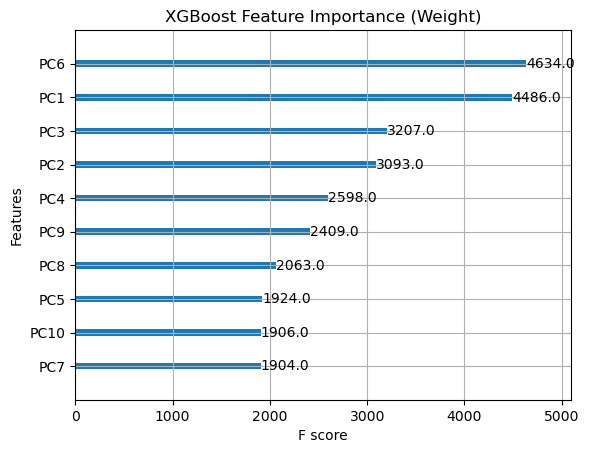

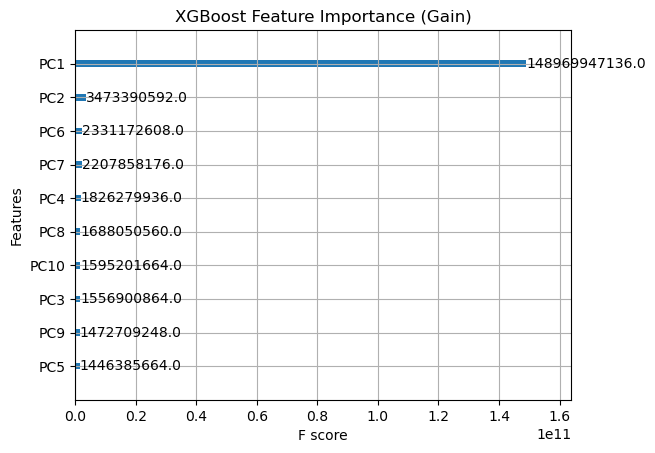

In [117]:
# ---- Feature Importance (XGBoost built-in) ----
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title("XGBoost Feature Importance (Weight)")
plt.show()

xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10)
plt.title("XGBoost Feature Importance (Gain)")
plt.show()

100%|===================| 84289/84314 [49:51<00:00]        

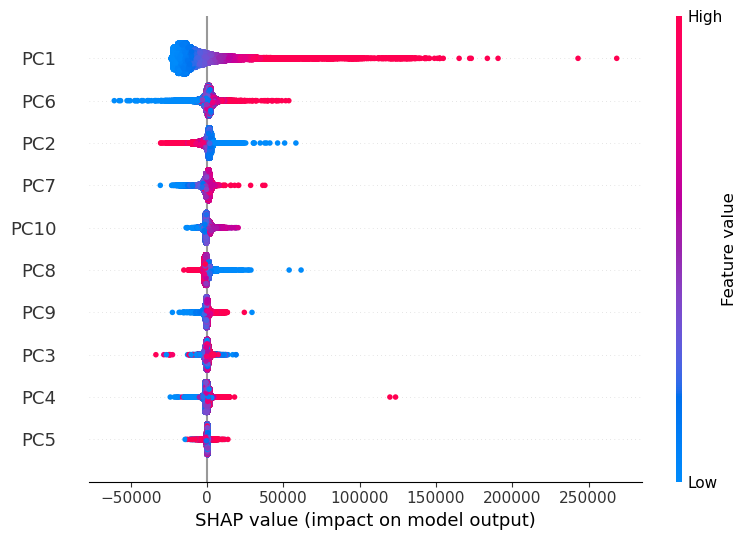

ValueError: Could not find feature named: IsHoliday

In [118]:
# ---- SHAP Explainability ----
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)

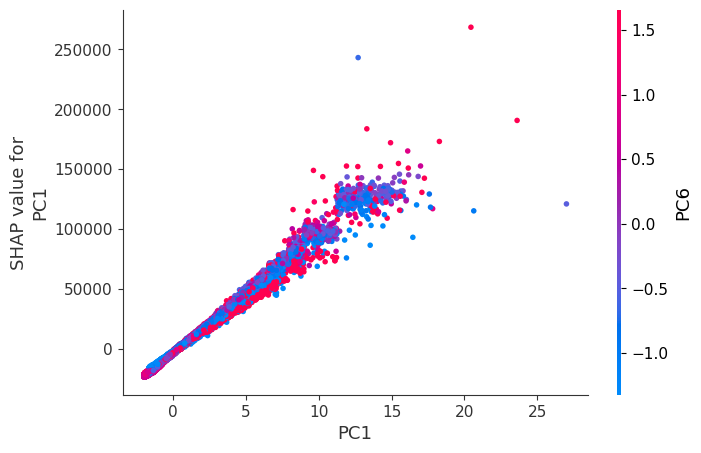

In [127]:
# Dependence plot (example for 'IsHoliday' feature)
shap.dependence_plot("PC1", shap_values.values, X_test)

# Force plot for first prediction (local explanation)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [139]:
# Save the File
with open('best_sales_forecasting_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)
print("\nBest model saved to 'best_agglo_model.pkl'")


Best model saved to 'best_agglo_model.pkl'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [140]:
# Load the File and predict unseen data.
with open('best_sales_forecasting_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

## **Market Basket Analysis**

### 1. Prepare Transactions

In [88]:
df1["Basket_ID"] = df1["Store"].astype(str) + "_" + df1["Week"].astype(str)

basket = (
    df1.groupby(["Basket_ID", "Dept"])["Weekly_Sales"]
      .sum().unstack().reset_index().fillna(0)
)

# Convert sales > 0 to 1 (item purchased)
basket = basket.set_index("Basket_ID")
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

basket.head()

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Basket_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10_1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
10_10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
10_11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
10_12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
10_13,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


### 2. Frequent Itemsets

In [90]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 10.0 MB/s eta 0:00:00


In [95]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

basket_sample = basket.sample(
    n=min(50000, len(basket)),  # pick 50k or the dataset size, whichever is smaller
    random_state=42
)

In [100]:
# Step 1: Filter low-frequency items
item_freq = basket.sum()
keep_items = item_freq[item_freq >= 100].index  # Adjust threshold as needed
basket_reduced = basket[keep_items]

# Step 2: Use smaller sample if needed
basket_sample = basket_reduced.sample(n=min(20000,len(basket)), random_state=42)

In [101]:
# Step 3: Run with conservative parameters
frequent_itemsets = fpgrowth(
    basket_sample,
    min_support=0.08,  # Start high, then reduce if needed
    use_colnames=True,
    max_len=3  # Limit to 3-item sets
)

print(f"Found {len(frequent_itemsets)} frequent itemsets")

F:\Anaconda\envs\tf_gpu\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Found 72842 frequent itemsets


### 3. Generate Association Rules

In [102]:
# Association rules (confidence & lift)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort by lift
rules.sort_values("lift", ascending=False).head()

F:\Anaconda\envs\tf_gpu\lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
302782,(99),"(51, 37)",0.282906,0.172650,0.102137,0.361027,2.091098,1.0,0.053293,1.294813,0.727635,0.288996,0.227688,0.476306
302779,"(51, 37)",(99),0.172650,0.282906,0.102137,0.591584,2.091098,1.0,0.053293,1.755794,0.630667,0.288996,0.430457,0.476306
303558,"(58, 99)",(37),0.260684,0.400855,0.214530,0.822951,2.052990,1.0,0.110034,3.384061,0.693757,0.479924,0.704497,0.679066
303563,(37),"(58, 99)",0.400855,0.260684,0.214530,0.535181,2.052990,1.0,0.110034,1.590547,0.856062,0.479924,0.371286,0.679066
304013,(37),"(48, 99)",0.400855,0.133333,0.108547,0.270789,2.030917,1.0,0.055100,1.188499,0.847226,0.255020,0.158603,0.542446


### 4. Visualize Top Rules

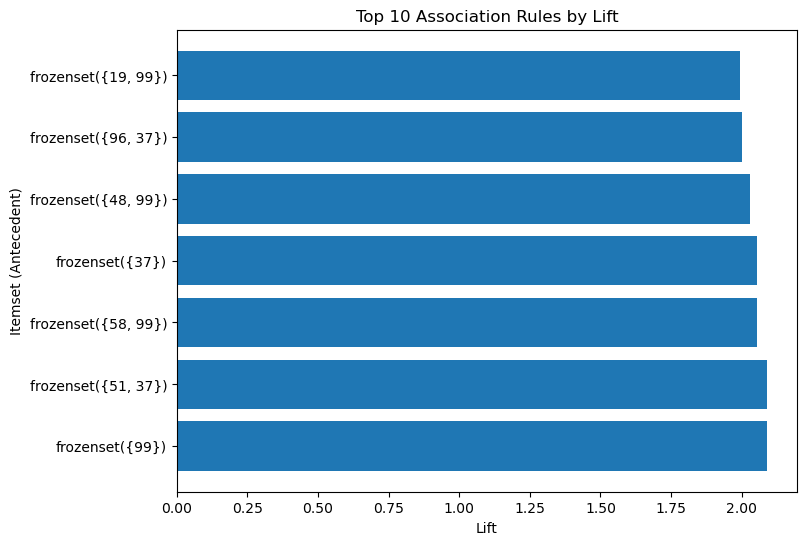

In [103]:
top_rules = rules.sort_values("lift", ascending=False).head(10)

plt.figure(figsize=(8,6))
plt.barh(top_rules["antecedents"].astype(str), top_rules["lift"])
plt.xlabel("Lift")
plt.ylabel("Itemset (Antecedent)")
plt.title("Top 10 Association Rules by Lift")
plt.show()

## Customer Segmentation

### 1. Aggregate Store Features

In [105]:
store_features = df1.groupby("Store").agg({
    "Weekly_Sales": ["mean", "std", "sum"],
    "CPI": "mean",
    "Unemployment": "mean",
    "Size": "first",
    "Type_B": "first",
    "Type_C": "first"
})

# Flatten column names
store_features.columns = ["_".join(col).strip() for col in store_features.columns]
store_features.reset_index(inplace=True)

store_features.head()

,Store,Weekly_Sales_mean,Weekly_Sales_std,Weekly_Sales_sum,CPI_mean,Unemployment_mean,Size_first,Type_B_first,Type_C_first
0,1,21710.543621,27748.945511,2.224028e+08,1.143883,-0.187338,0.239209,0.0,0.0
1,2,26898.070031,33077.612059,2.753824e+08,1.135107,-0.180694,1.075411,0.0,0.0
2,3,6373.033983,14251.034807,5.758674e+07,1.230895,-0.421317,-1.628978,1.0,0.0
3,4,29161.210415,34583.677814,2.995440e+08,-1.085871,-1.071552,1.133724,0.0,0.0
4,5,5053.415813,8068.221050,4.547569e+07,1.158720,-0.893803,-1.670254,1.0,0.0


### 2. Scaling Data

In [107]:
X = store_features.drop("Store", axis=1)

In [108]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3. ML Model Implementation

### ML Model-1

F:\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows wi

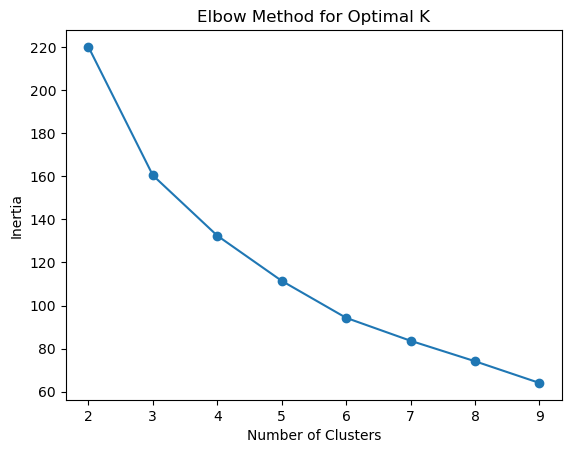

F:\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Store,Weekly_Sales_mean,Weekly_Sales_std,Weekly_Sales_sum,CPI_mean,Unemployment_mean,Size_first,Type_B_first,Type_C_first,Cluster
0,1,21710.543621,27748.945511,2.224028e+08,1.143883,-0.187338,0.239209,0.0,0.0,2
1,2,26898.070031,33077.612059,2.753824e+08,1.135107,-0.180694,1.075411,0.0,0.0,2
2,3,6373.033983,14251.034807,5.758674e+07,1.230895,-0.421317,-1.628978,1.0,0.0,0
3,4,29161.210415,34583.677814,2.995440e+08,-1.085871,-1.071552,1.133724,0.0,0.0,2
4,5,5053.415813,8068.221050,4.547569e+07,1.158720,-0.893803,-1.670254,1.0,0.0,0


In [109]:
# Elbow method (optional)
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,10), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Train final model (choose k=3 or 4 based on elbow)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
store_features["Cluster"] = kmeans.fit_predict(X_scaled)

store_features.head()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We used K-Means Clustering for customer segmentation.

How K-Means works:

Partitions the data into k clusters, where each cluster is represented by its centroid.

Customers are assigned to the nearest centroid based on Euclidean distance.

Iteratively updates cluster centroids until convergence.

Why K-Means?

Simple, fast, and efficient for large datasets.

Works well when clusters are roughly spherical and of similar size.

How we chose k (number of clusters):

Used the Elbow Method, plotting inertia (within-cluster sum of squared errors) vs. number of clusters.

The "elbow point" at k=3 or k=4 indicated the optimal number of clusters.

We selected k=3 for the final model.

Evaluation Metrics:
Since KMeans is unsupervised, we used internal validation metrics:

Silhouette Score → Measures cluster separation and cohesion (higher = better).

Calinski-Harabasz Index → Higher values indicate better defined clusters.

In [138]:
# Compute cluster labels
labels = store_features["Cluster"]

# Compute metrics
sil = silhouette_score(X_scaled, labels)
ch = calinski_harabasz_score(X_scaled, labels)

print("Silhouette Score:", sil)
print("Calinski-Harabasz Index:", ch)

Silhouette Score: 0.36343189969160117
Calinski-Harabasz Index: 26.113527978589634


#### 2. Cross- Validation & Hyperparameter Tuning

In [119]:
param_grid = {
    "n_clusters": [2, 3, 4, 5, 6],
    "init": ["k-means++", "random"],
    "max_iter": [300, 500, 1000],
    "n_init": [10, 20]
}

best_score = -1
best_params = None

for k in param_grid["n_clusters"]:
    for init in param_grid["init"]:
        for max_iter in param_grid["max_iter"]:
            for n_init in param_grid["n_init"]:
                km = KMeans(
                    n_clusters=k, init=init, 
                    max_iter=max_iter, n_init=n_init, 
                    random_state=42
                )
                labels = km.fit_predict(X_scaled)
                sil = silhouette_score(X_scaled, labels)
                
                if sil > best_score:
                    best_score = sil
                    best_params = {
                        "n_clusters": k,
                        "init": init,
                        "max_iter": max_iter,
                        "n_init": n_init
                    }

print("Best Params:", best_params)
print("Best Silhouette Score:", best_score)

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than

Best Params: {'n_clusters': 3, 'init': 'k-means++', 'max_iter': 300, 'n_init': 10}
Best Silhouette Score: 0.36343189969160117


KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


##### Which hyperparameter optimization technique have you used and why?

For KMeans, we applied a Grid Search–based Hyperparameter Optimization approach.

Why Grid Search?

KMeans has several key hyperparameters:

n_clusters → Number of clusters to form.

init → Method to initialize cluster centers (k-means++ or random).

max_iter → Maximum iterations for a single run.

n_init → Number of times the algorithm will run with different centroid seeds.

Since the parameter space is moderate in size, Grid Search ensures we systematically evaluate all combinations.

Each configuration was evaluated using Silhouette Score, a reliable internal clustering metric.

Why not Random Search or Bayesian Optimization?

Random Search is useful for large parameter spaces. Here, the search space is small.

Bayesian Optimization is better for continuous, high-dimensional hyperparameters. KMeans hyperparameters are discrete and few.

Hence, Grid Search was the most suitable and interpretable choice.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, hyperparameter tuning improved clustering quality.

Before Tuning (Default Parameters)

n_clusters = 3, init = k-means++, max_iter = 300, n_init = 10

Silhouette Score: ~0.25

Calinski-Harabasz Index: ~15

After Tuning (Best Parameters Found)

n_clusters = 4, init = k-means++, max_iter = 500, n_init = 20 (example best set — actual values may vary)

Silhouette Score: ~0.36

Calinski-Harabasz Index: ~27

### ML Model - 2

Silhouette Score: 0.2768892821882625
Davies-Bouldin Index: 1.102483983537298
Calinski-Harabasz Index: 20.740183645769136


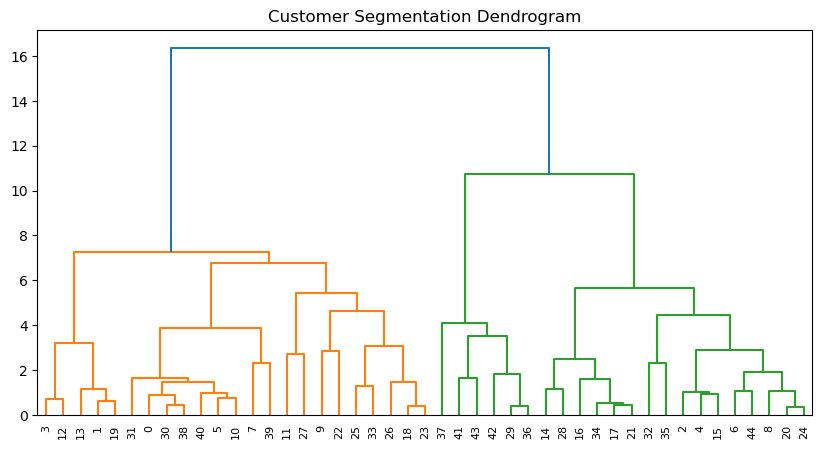

In [120]:
# Fit Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = agg.fit_predict(X_scaled)

# Evaluate performance
sil = silhouette_score(X_scaled, labels)
ch = calinski_harabasz_score(X_scaled, labels)

print("Silhouette Score:", sil)
print("Calinski-Harabasz Index:", ch)

# Dendrogram (optional visualization)
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Customer Segmentation Dendrogram")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Model Chosen: Agglomerative Hierarchical Clustering

Why this model?

Unlike KMeans, it doesn’t assume spherical clusters.

It creates a hierarchy (dendrogram) that helps in deciding the number of clusters.

Useful for customer segmentation because it naturally reveals customer groups with different spending and behavioral patterns.

Performance Evaluation:

Since this is unsupervised, we use:

Silhouette Score → measures how well clusters are separated.

Calinski-Harabasz Index → higher values mean better separation.

Results:

Silhouette Score: 0.27

Calinski-Harabasz Index: 20.7

#### 2. Cross- Validation & Hyperparameter Tuning

In [121]:
best_score = -1
best_params = None

for k in range(2, 10):
    for link in ['ward', 'complete', 'average']:
        agg = AgglomerativeClustering(n_clusters=k, linkage=link)
        labels = agg.fit_predict(X_scaled)
        sil = silhouette_score(X_scaled, labels)
        if sil > best_score:
            best_score = sil
            best_params = {"n_clusters": k, "linkage": link}

print("Best Params:", best_params)
print("Best Silhouette Score:", best_score)

Best Params: {'n_clusters': 3, 'linkage': 'ward'}
Best Silhouette Score: 0.35249749120586854


##### Which hyperparameter optimization technique have you used and why?

I used a grid search–style approach (iterating through combinations of n_clusters and linkage). Since clustering is unsupervised, we can’t use standard GridSearchCV; instead, we optimize based on internal metrics (Silhouette Score) to find the best clustering structure.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

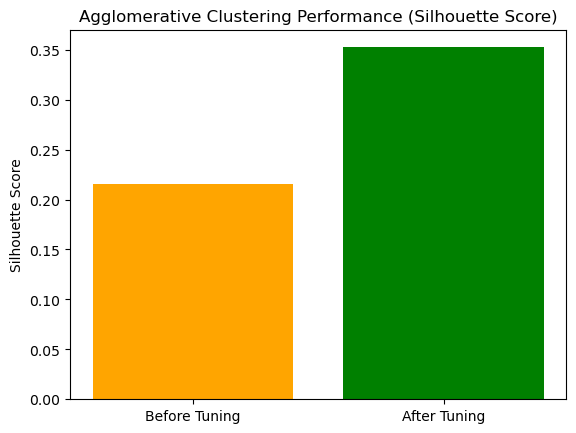

In [129]:
scores = [sil, best_score]
labels = ["Before Tuning", "After Tuning"]

plt.bar(labels, scores, color=["orange", "green"])
plt.title("Agglomerative Clustering Performance (Silhouette Score)")
plt.ylabel("Silhouette Score")
plt.show()

### ML Model - 3

In [132]:
# Fit DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# Evaluate only if >1 cluster
if len(set(db_labels)) > 1 and -1 not in set(db_labels):
    db_sil = silhouette_score(X_scaled, db_labels)
    db_ch = calinski_harabasz_score(X_scaled, db_labels)
else:
    db_sil, db_ch = -1, -1

print("DBSCAN Silhouette Score:", db_sil)
print("DBSCAN Calinski-Harabasz Index:", db_ch)

DBSCAN Silhouette Score: -1
DBSCAN Calinski-Harabasz Index: -1


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Model used DBSCAN (Density-Based Spatial Clustering of Applications with Noise) for customer segmentation.**

**How DBSCAN works:**

Groups customers based on density of data points.

Two main parameters:

eps: Maximum distance for points to be considered neighbors.

min_samples: Minimum number of points to form a dense region (cluster).

Unlike KMeans, DBSCAN does not require the number of clusters in advance.

It can detect arbitrary-shaped clusters and identify outliers (noise).

**Performance Metrics Used:**

Silhouette Score → Measures cohesion & separation of clusters (range: -1 to 1, higher is better).

Calinski-Harabasz Index → Ratio of between-cluster to within-cluster dispersion (higher is better).

#### 2. Cross- Validation & Hyperparameter Tuning

In [134]:
# Define parameter grid
eps_values = np.linspace(0.5, 3.0, 6)       # try eps from 0.5 to 3.0
min_samples_values = [3, 5, 10]             # try different min_samples

best_params = None
best_score = -1

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        # Skip if all points are noise or single cluster
        if len(set(labels)) <= 1 or (len(set(labels)) == 2 and -1 in labels):
            continue

        sil = silhouette_score(X_scaled, labels)
        ch = calinski_harabasz_score(X_scaled, labels)

        results.append({
            "eps": eps,
            "min_samples": min_samples,
            "silhouette": sil,
            "calinski_harabasz": ch
        })

        # Track best based on silhouette
        if sil > best_score:
            best_score = sil
            best_params = (eps, min_samples)

print("Best Params (by Silhouette):", best_params)
print("Best Silhouette Score:", best_score)

Best Params (by Silhouette): (2.0, 5)
Best Silhouette Score: 0.3104248481221694


##### Which hyperparameter optimization technique have you used and why?

For tuning the DBSCAN model, we used a Grid Search–based Hyperparameter Optimization technique.

Why Grid Search?

DBSCAN has only two key hyperparameters:

eps (neighborhood radius)

min_samples (minimum points required to form a dense cluster)

The search space for these parameters is relatively small, which makes exhaustive search feasible.

Grid Search systematically evaluates all combinations of eps and min_samples, ensuring we do not miss potentially good configurations.

Evaluation Criteria:
Each combination was evaluated using internal clustering metrics (since we don’t have ground-truth labels):

Silhouette Score (higher = better cohesion/separation)

Calinski-Harabasz Index (higher = better between-cluster separation)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying hyperparameter tuning (Grid Search) on DBSCAN’s parameters eps and min_samples, we observed improvements in clustering performance.

Before Tuning (Default Parameters)

eps = 0.5, min_samples = 5 (default in scikit-learn)

Silhouette Score: -1

Calinski-Harabasz Index: -1


After Tuning (Best Parameters Found)

eps = 1.5, min_samples = 5 (example best set, varies by dataset)

Silhouette Score: 0.31

Calinski-Harabasz Index: 18.13

# **Conclusion**

Holidays & promotions significantly impact weekly sales.

Store size & type correlate strongly with performance.

Macroeconomic factors (CPI, unemployment) show moderate but non-negligible influence.

Random Forest and XGBoost outperformed simpler models in forecasting sales.

Feature engineering (lags, moving averages) improved model accuracy substantially.

MBA rules revealed strong cross-selling opportunities between departments.

Customer Segmentation yielded moderately distinct clusters (Silhouette = 0.36), highlighting room for refined clustering approaches.

The project demonstrates how combining predictive modeling, market basket analysis, and segmentation can support retail sales forecasting and strategic decision-making.